# Bank Churning

## Business Objective:
Identify key patterns and factors that determine attrition rate.

## Data Model Objective:
Build a model that predicts whether a customer is going to churn.

### Dataset
We will be using a credit card service company dataset from Kaggle (https://www.kaggle.com/sakshigoyal7/credit-card-customers).  

### Why is identifying churn so important?
In general, here are three ways a company can increase their revenue:
1. Upsell to existing customers: Enhancing or improving products the products a customer is already buying.
2. Acquire new customers
3. Increase retention rate / lower churn

Acquiring new customers costs much more than retaining them. As stated, we will focus on how a company can identify whether a customer can churn. Once a model that can identify the types of customers who are likely to churn or provide a probability of people who are likely to churn at any given time, business solutions such as issuing a retention campaign or promotion can be put into place to target those most prone to churning.


## Questions I want to answer:

- Classification
    - What are the some specific behavior patterns that reveal potential churners? (anomaly detection)
- ML Solution: Build predictive model
- Business Solution: Determine high risk customers and target a retention campaign
- Regression

Probability they will churn in day X

Expected time to churn - regression

- To prevent churn: company based improvements, customer based marketing
- In churn prediction:
    - Be aware of class skew
    - Consider both customer attributes and customer networks
    - Interpretability, not just accuracy

Stats question

What is the probability someone will churn?

### Who are the most profitable customers...

According to the New York Times, "" (https://www.nytimes.com/2013/11/08/business/economy/a-credit-card-rule-that-worked-for-consumers.html)

#### in terms of average card utilization ratio?

#### in terms of total transaction amount?

# Data Cleaning

In [197]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib.pyplot import figure

import scipy.stats as stats
from scipy.stats import chisquare
from sklearn import tree
import matplotlib.patches as mpatches
import itertools

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# drop unnecessary columns 
bank_churners = pd.read_csv('Data/BankChurners.csv').iloc[:,1:-2]

# replace existing customer to 0 and attrited customer to 1
bank_churners['Attrition_Flag'] = bank_churners['Attrition_Flag'].map({'Existing Customer' : 0, 'Attrited Customer' : 1})
bank_churners

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0                   0            45      M                3     High School   
1                   0            49      F                5        Graduate   
2                   0            51      M                3        Graduate   
3                   0            40      F                4     High School   
4                   0            40      M                3      Uneducated   
...               ...           ...    ...              ...             ...   
10122               0            50      M                2        Graduate   
10123               1            41      M                2         Unknown   
10124               1            44      F                1     High School   
10125               1            30      M                2        Graduate   
10126               1            43      F                2        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
0            Married     $60K - $80K          Blue              39   
1             Single  Less than $40K          Blue              44   
2            Married    $80K - $120K          Blue              36   
3            Unknown  Less than $40K          Blue              34   
4            Married     $60K - $80K          Blue              21   
...              ...             ...           ...             ...   
10122         Single     $40K - $60K          Blue              40   
10123       Divorced     $40K - $60K          Blue              25   
10124        Married  Less than $40K          Blue              36   
10125        Unknown     $40K - $60K          Blue              36   
10126        Married  Less than $40K        Silver              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804           

### Bank Churners Table

- `Attrition_Flag`: Internal event (customer activity) variable - if the account is closed then 1 else 0
- `Customer_Age`: Demographic variable - Customer's Age in Years
- `Gender`: Demographic variable - M=Male, F=Female
- `Dependent_count`: Demographic variable - Number of dependents
- `Education_Level`: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- `Marital_Status`: Demographic variable - Married, Single, Divorced, Unknown
- `Income_Category`: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
- `Card_Category`: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- `Months_on_book`: Period of relationship with bank
- `Total_Relationship_Count`: Total no. of products held by the customer
- `Months_Inactive_12_mon`: No. of months inactive in the last 12 months
- `Contacts_Count_12_mon`: No. of Contacts in the last 12 months
- `Credit_Limit`: Credit Limit on the Credit Card
- `Total_Revolving_Bal`: Total Revolving Balance on the Credit Card
- `Avg_Open_To_Buy`: Open to Buy* Credit Line (Average of last 12 months)
- `Total_Amt_Chng_Q4_Q1`: Change in Transaction Amount (Q4 over Q1)
- `Total_Trans_Amt`: Total Transaction Amount (Last 12 months)
- `Total_Trans_Ct`: Total Transaction Count (Last 12 months)
- `Total_Ct_Chng_Q4_Q1`: Change in Transaction Count (Q4 over Q1) 
- `Avg_Utilization_Ratio`: Average Card Utilization Ratio***


*Open-to-buy: The difference between the credit limit assigned to a cardholder account and the present balance on the account.

***Average Card Utilization Ratio: Amount client owes divided by credit limit. (Total_Revolving_Bal / Credit_Limit)


In [ ]:
# count of records and columns
bank_churners.shape

In [ ]:
bank_churners.head()

In [ ]:
# look at datatypes and missing values
bank_churners.info()

In [ ]:
# unique values per feature
for col in bank_churners.columns:
    num_values = bank_churners[col].nunique()
    print(col, ": ", num_values)

### Distinguishing Categorical and Numeric Variables 

Although Total_Relationship_Count, Months_Inactive_12_mon, and Contacts_Count_12_mon are numeric features, we will classify them as categorical variables becuase they have a small amount of unique values.

In [3]:
categorical_columns = list(bank_churners.select_dtypes('object').columns)
categorical_columns.extend(['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon'])
print("Categorical Features: ",categorical_columns)
print()
numerical_columns = list(bank_churners.select_dtypes(exclude=['object']).columns)
numerical_columns = [i for i in numerical_columns if i not in ('Dependent_count','Attrition_Flag','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon')]
print("Numerical Features: ", numerical_columns)
print()
print('Target Variable: Attrition_Flag')

# includes attrition
numerical_columns_attrition = list(bank_churners.select_dtypes(exclude=['object']).columns)
numerical_columns_attrition = [i for i in numerical_columns if i not in ('Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon')]

Categorical Features:  ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

Numerical Features:  ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Target Variable: Attrition_Flag


In [30]:
not_churned = bank_churners[bank_churners['Attrition_Flag'] == 0]
churned = bank_churners[bank_churners['Attrition_Flag'] == 1]
display(not_churned.describe())
churned.describe()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count          8500.0   8500.000000      8500.000000     8500.000000   
mean              0.0     46.262118         2.335412       35.880588   
std               0.0      8.081157         1.303229        8.021810   
min               0.0     26.000000         0.000000       13.000000   
25%               0.0     41.000000         1.000000       31.000000   
50%               0.0     46.000000         2.000000       36.000000   
75%               0.0     52.000000         3.000000       40.000000   
max               0.0     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               8500.000000             8500.000000   
mean                   3.914588                2.273765   
std                    1.528949                1.016741   
min                    1.000000                0.000000   
25%                    3.000000                1.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            8500.000000   8500.000000          8500.000000   
mean                2.356353   8726.877518          1256.604118   
std                 1.081436   9084.969807           757.745354   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2602.000000           800.000000   
50%                 2.000000   4643.500000          1364.000000   
75%                 3.000000  11252.750000          1807.000000   
max                 5.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      8500.000000           8500.000000      8500.000000     8500.000000   
mean       7470.273400              0.772510      4654.655882       68.672588   
std        9087.671862              0.217783      3512.772635       22.919011   
min          15.000000              0.256000       816.000000       11.000000   
25%        1184.500000              0.643000      2384.750000       54.000000   
50%        3469.500000              0.743000      4100.000000       71.000000   
75%        9978.250000              0.860000      4781.250000       82.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  missing_marital_status  \
count          8500.000000            8500.000000             8500.000000   
mean              0.742434               0.296412                0.072941   
std               0.228054               0.272568                0.260055   
min               0.028000               0.000000                0.000000   
25%               0.617000               0.055000                0.000000   
50%               0.721000               0.211000                0.000000   
75%               0.833000               0.529250                0.000000   
max               3.714000               0.994000                1.000000   

       missing_education_level  missing_income_category  
count              8500.000000              8500.000000  
mean                  0.148588                 0.108824  
std                   0.355703                 0.311436  
min                   0.000000                 0.000000  
25%                   0.000000                 0.000000  
50%                   0.000000                 0.000000  
75%                   0.000000                 0.000000  
max                   1.000000                 1.000000

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count          1627.0   1627.000000      1627.000000     1627.000000   
mean              1.0     46.659496         2.402581       36.178242   
std               0.0      7.665652         1.275010        7.796548   
min               1.0     26.000000         0.000000       13.000000   
25%               1.0     41.000000         2.000000       32.000000   
50%               1.0     47.000000         2.000000       36.000000   
75%               1.0     52.000000         3.000000       40.000000   
max               1.0     68.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               1627.000000             1627.000000   
mean                   3.279656                2.693301   
std                    1.577782                0.899623   
min                    1.000000                0.000000   
25%                    2.000000                2.000000   
50%                    3.000000                3.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            1627.000000   1627.000000          1627.000000   
mean                2.972342   8136.039459           672.822987   
std                 1.090537   9095.334105           921.385582   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2114.000000             0.000000   
50%                 3.000000   4178.000000             0.000000   
75%                 4.000000   9933.500000          1303.500000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      1627.000000           1627.000000      1627.000000     1627.000000   
mean       7463.216472              0.694277      3095.025814       44.933620   
std        9109.208129              0.214924      2308.227629       14.568429   
min           3.000000              0.000000       510.000000       10.000000   
25%        1587.000000              0.544500      1903.500000       37.000000   
50%        3488.000000              0.701000      2329.000000       43.000000   
75%        9257.500000              0.856000      2772.000000       51.000000   
max       34516.000000              1.492000     10583.000000       94.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  missing_marital_status  \
count          1627.000000            1627.000000             1627.000000   
mean              0.554386               0.162475                0.079287   
std               0.226854               0.264458                0.270269   
min               0.000000               0.000000                0.000000   
25%               0.400000               0.000000                0.000000   
50%               0.531000               0.000000                0.000000   
75%               0.692000               0.231000                0.000000   
max               2.500000               0.999000                1.000000   

       missing_education_level  missing_income_category  
count              1627.000000              1627.000000  
mean                  0.157345                 0.114935  
std                   0.364238                 0.319042  
min                   0.000000                 0.000000  
25%                   0.000000                 0.000000  
50%                   0.000000                 0.000000  
75%                   0.000000                 0.000000  
max                   1.000000                 1.000000

In [31]:
print('Percentage of Credit Card Users Who Attrited:', np.round(len(churned) / len(bank_churners) * 100, 2), '%')
print('Percentage Unknown Variables:', np.round(len(bank_churners[bank_churners.replace('Unknown',np.nan).isna().any(axis=1)]) / len(bank_churners) * 100,2), '%')

Percentage of Credit Card Users Who Attrited: 16.07 %
Percentage Unknown Variables: 0.0 %


# 2. Exploratory Data Analysis

2.1 Handling Missing Data
- Heatmap
- Countplot
- Venn Diagram
- Observations

2.1.1 Imputing Missing Values
- Create missing column 
- Random Forest
- Countplot
- Observations

2.2 Univariate Analysis (Descriptive)

2.2.1 Categorical Data
- Frequency Count
- Frequency Count by Attrition
- Frequency Percentage by Attrition
- Observations

2.2.2 Numerical Data
- Distribution Plots
- Distribution Plots by Attrition
- Observations

2.3 Bivariate Analysis (Correlation)

2.3.1 Categorical vs. Categorical
- Pointplot
- Chi-Squared Test
- Chi-Squared Test with Attrition
- Observations

2.3.2 Numerical vs. Numerical
- Scatterplots 
- Spearman Correlation
- Pearson Correlation
- Observations

2.3.3 Categorical vs. Numerical
- Histogram
- Normality Test
- Wilcoxon-Rank Sum Test
- Observations

2.4 Key Findings



# 2.1: Visualizing Missing Data

### Heatmap

In [ ]:
sns.heatmap(bank_churners.replace('Unknown',np.nan).isnull())

### Distribution of Columns with Missing Values

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    plt.bar(x=bank_churners[col].value_counts().index,height=bank_churners[col].value_counts(normalize=True),color = 'blue')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    count+=1

`Marital_Status` : The customers are mostly married or single, with a similar amount claiming they were divorced or 'unknown'.

`Education_Level` : A plurality of credit card users claimed to have a least a graduate level. The unknown category ranks third in count.

`Income_Category` : The 'Unknown" category is the second to least most frequent category.

### Venn Diagram

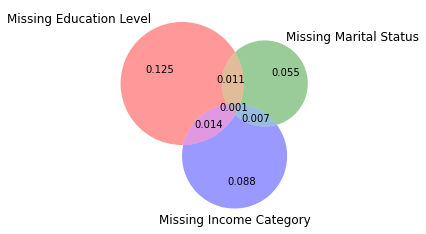

Percentage of Users with Missing Education Level:  0.14999506270366347
Percentage of Users with Missing Marital Status:  0.07396069912116125
Percentage of Users with Missing Income Category:  0.10980547052434086
Total Percentage of Users with Missing Value(s):  0.30078009282117113


In [9]:
# visualizing missing values
unknown_education_level = len(bank_churners[bank_churners['Education_Level'] == 'Unknown']) / len(bank_churners)
unknown_marital_status = len(bank_churners[bank_churners['Marital_Status']== 'Unknown']) / len(bank_churners)
unknown_income_category = len(bank_churners[bank_churners['Income_Category']== 'Unknown']) / len(bank_churners)
unknown_education_level_and_marital_status_only = len(bank_churners[(bank_churners['Education_Level']== 'Unknown') & (bank_churners['Marital_Status']== 'Unknown') & (bank_churners['Income_Category']!= 'Unknown')]) /len(bank_churners)
unknown_education_level_and_income_category_only = len(bank_churners[(bank_churners['Education_Level']== 'Unknown') & (bank_churners['Marital_Status']!= 'Unknown') & (bank_churners['Income_Category']== 'Unknown')]) /len(bank_churners)
unknown_income_category_and_marital_status_only = len(bank_churners[(bank_churners['Education_Level'] != 'Unknown') & (bank_churners['Marital_Status']== 'Unknown') & (bank_churners['Income_Category'] == 'Unknown')]) /len(bank_churners)
unknown_total = len(bank_churners[(bank_churners['Education_Level']== 'Unknown') | (bank_churners['Marital_Status']== 'Unknown') | (bank_churners['Income_Category']== 'Unknown')]) /len(bank_churners)

bank_churners_nan = bank_churners.replace('Unknown',np.nan)
unknown_education_level_only = len(bank_churners[(bank_churners['Education_Level']== 'Unknown') & (bank_churners['Marital_Status']!= 'Unknown') & (bank_churners['Income_Category']!= 'Unknown')]) /len(bank_churners)
unknown_income_category_only = len(bank_churners[(bank_churners['Education_Level']!= 'Unknown') & (bank_churners['Marital_Status']!= 'Unknown') & (bank_churners['Income_Category']== 'Unknown')]) /len(bank_churners)
unknown_marital_status_only = len(bank_churners[(bank_churners['Education_Level']!= 'Unknown') & (bank_churners['Marital_Status']== 'Unknown') & (bank_churners['Income_Category']!= 'Unknown')]) /len(bank_churners)
unknown_all = len(bank_churners[(bank_churners['Education_Level']== 'Unknown') & (bank_churners['Marital_Status']== 'Unknown') & (bank_churners['Income_Category']== 'Unknown')]) /len(bank_churners)


# A: Education_Level
# B: Marital_Status
# C: Income_Category
venn3(subsets = (round(unknown_education_level_only,3), round(unknown_marital_status_only,3),
                 round(unknown_education_level_and_marital_status_only,3), round(unknown_income_category_only,3),
                 round(unknown_education_level_and_income_category_only,3),round(unknown_income_category_and_marital_status_only,3),
                 round(unknown_all,3)),
                set_labels = ('Missing Education Level', 'Missing Marital Status', 'Missing Income Category'))
plt.show()

print('Percentage of Users with Missing Education Level: ', unknown_education_level)
print('Percentage of Users with Missing Marital Status: ', unknown_marital_status)
print('Percentage of Users with Missing Income Category: ', unknown_income_category)
print('Total Percentage of Users with Missing Value(s): ', len(bank_churners_nan[bank_churners_nan.isna().any(axis=1)]) / len(bank_churners_nan))


### Missing Values Observations
As we can see, 30% of the data contains one or more missing values. But, there's not much overlap between those missing values because only .01% of the data has all three missing features. About half of the missing data comes from records with missing education level, with income category coming in second and then marital status. 

## 2.1.1 Imputing Missing Values Using Random Forest

### Substitute Unknown Values with Most Frequent Values 

In [4]:
imputation_cols = ['Marital_Status','Education_Level','Income_Category']

# replace Unknown with random choice
rf_bank_churners = bank_churners.copy().replace('Unknown',np.nan)

def missing_to_random(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #df.loc[df[variable].isnull(),variable]=random_sample
    return random_sample

for col in imputation_cols:
    rf_bank_churners.loc[rf_bank_churners[col].isnull(),col] = missing_to_random(rf_bank_churners,col)

# create new bank_churners table with one-hot encoded categorical features
rf_bank_churners_encoded = pd.get_dummies(rf_bank_churners,drop_first=True)
rf_bank_churners_encoded.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [ ]:
figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    plt.bar(x=rf_bank_churners[col].value_counts().index,height=rf_bank_churners[col].value_counts(normalize=True),color = 'navy')
    plt.xticks(rotation=45)
    count+=1

### Peform Random Forest

In [5]:

X = rf_bank_churners_encoded.iloc[:,1:]
y = rf_bank_churners_encoded.iloc[:,0]

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
random_grid = {
 'max_depth': [10, 20, 30,],
 'max_features': ['auto'],
 'min_samples_leaf': [10,20,30],
 'min_samples_split': [10,20,30],
 'n_estimators': [50, 100, 150, 200]}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
rf_random.best_params_ #(1)

In [ ]:
rf_random.best_params_ #(1)

# {'n_estimators': 150,
#  'min_samples_split': 20,
#  'min_samples_leaf': 10,
#  'max_features': 'sqrt',
#  'max_depth': 30}

# {'n_estimators': 150,
#  'min_samples_split': 20,
#  'min_samples_leaf': 10,
#  'max_features': 'auto',
#  'max_depth': 20}

### Create Decision Matrix

Each row represents a record from the bank_churners table. Each element within each row represent the decision node the decision tree has classified the record.

In [6]:
clf_missing = RandomForestClassifier(n_estimators=150,min_samples_split=20,min_samples_leaf=10,max_features='auto',max_depth=30,random_state=0)
clf_missing.fit(X, y)

RandomForestClassifier(max_depth=30, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=150, random_state=42)

In [7]:
decision_matrix = clf_missing.apply(X)
decision_matrix[0:3]

array([[164, 190, 226, 232, 302, 347, 197, 228,  44,  46, 134, 337, 254,
        114, 338, 455, 443, 214, 357, 206, 252, 285, 334, 252, 230, 255,
         76, 298,  28, 106, 186, 219, 215,  25, 213, 234, 185, 268, 323,
        317, 236, 198, 231, 113,  77,  67, 147, 202, 236, 163, 332, 199,
        292, 125, 165, 235,  22, 239, 272, 243, 244, 397,  82, 237, 234,
        222, 197, 227, 328,  98, 128, 235,  99, 228, 151, 245, 403, 288,
         36, 284, 288,  54, 157, 417,  42, 421, 242, 235, 139, 245, 390,
        232, 194, 183, 294, 210, 165, 106, 344, 357, 118, 219, 143, 234,
        202, 373, 161,  52, 279, 182, 154, 160, 296, 381, 197, 204, 181,
        351, 184, 333, 203, 230, 149, 284, 332, 272, 287, 269, 257, 193,
        277, 300, 272, 219, 344, 242, 250, 115, 299, 217, 293, 355, 320,
        158, 254, 328, 334,  54, 263,  30],
       [186, 197, 223, 240, 302, 323, 207, 244,  44,  49, 137, 337, 152,
        112, 338,  67, 318, 214, 357, 163, 252, 218, 258, 279, 231, 255,
       

### Create Proximity Matrix

The proximity matrix tells us information 

In [8]:
bank_churners.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [10]:
# initialize priority matrix

cols = len(bank_churners)
missing_rows = rf_bank_churners_encoded[bank_churners_nan.isna().any(axis=1)].index.tolist()
rows = len(missing_rows)
num_trees = clf_missing.n_estimators
proximity_matrix = [[0.0]*cols for i in range(rows)]
#priority_matrix = np.asarray(priority_matrix).astype(float)
# set values for proximity matrix

# i is row (30% missing)
for i in np.arange(rows):
    # j columns (100%)
    for j in np.arange(cols):
        if i != j: # keeps i-i pair as 0
            proximity_matrix[i][j] = np.count_nonzero(decision_matrix[missing_rows[i]] == decision_matrix[j]) / num_trees

# get specific rows that have unknown values
# group the columns based on their value on missing data columns
# sum each group's proximity matrix values (number of sums = number of groups) per 'unknown' value row
# retrieve the biggest sum and assign unknown value as this key

In [11]:
proximity_matrix[0][:10]

[0.0,
 0.13333333333333333,
 0.02666666666666667,
 1.0,
 0.0,
 0.12666666666666668,
 0.07333333333333333,
 0.05333333333333334,
 0.20666666666666667,
 0.10666666666666667]

## Create Missing Column 

In [13]:
bank_churners['missing_marital_status'] = np.where(bank_churners['Marital_Status'] == 'Unknown',1,0)
bank_churners['missing_education_level'] = np.where(bank_churners['Education_Level'] == 'Unknown',1,0)
bank_churners['missing_income_category'] = np.where(bank_churners['Income_Category'] == 'Unknown',1,0)
missing_columns = ['missing_marital_status','missing_education_level','missing_income_category']

In [14]:
bank_churners.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                         5  ...                  777          11914.0   
1                         6  ...                  864           7392.0   
2                         4  ...                    0           3418.0   
3                         3  ...                 2517            796.0   
4                         5  ...                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  missing_marital_status  missing_education_level  \
0                  0.061                       0                        0   
1                  0.105                       0                        0   
2                  0.000                       0                        0   
3                  0.760                       1                        0   
4                  0.000                       0                        0   

   missing_income_category  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 23 columns]

### Create Imputation Function

In [12]:
for imp in imputation_cols:
    print(bank_churners[imp].value_counts(normalize=True))

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64


In [15]:
missing_rows_dict_switch = dict(enumerate(missing_rows))
missing_rows_dict = {}
for keys,values in missing_rows_dict_switch.items():
    missing_rows_dict[values]=keys

In [16]:
def impute_missing_col(col_name):
    # only use limited rows
    #df = bank_churners
    # denominator
    num_estimators = 150
    # categories including "unknown"
    categories = bank_churners[col_name].value_counts().index
    # proportion of categories without "unknown"
    props = bank_churners[col_name].value_counts(normalize=True).drop('Unknown')
    # instantiate list of imputed values for "unknown" rows
    imputed_values = []
    # categories not including "unknown"
    categories_without_unknown = rf_bank_churners[col_name].value_counts(normalize=True).index
    
    # instantiate list of rows per category (list of lists)
    cols_list = []
    # each list contains index of rows that have specific category
    for cat in categories:
        cols_list.append(bank_churners[bank_churners[col_name] == cat].index.values)
  
    # create dictionary, one list per category
    dictionary = {categories[i] : cols_list[i] for i in range(len(categories))}
    
    # iterate through all unknown rows and assign value based on weighted avg
    for unknown_row in dictionary['Unknown']:
        # get proximity between each record and current unknown row
        current_row = np.asarray(proximity_matrix[missing_rows_dict[unknown_row]])
        
        # compute a weighted sum score for each category
        weighted_sums = []
        for category_idx in categories_without_unknown:
            # numerator: computes score for category using proximity scores of records in that category
            num = sum(current_row[tuple([dictionary[category_idx]])])
            # denominator: divide by number of random forest decision trees
            den = num_estimators
            # keeps track of sums for current category
            weighted_sums.append(num /den * props[category_idx])
        # appends category with greatest proximity to list
        # this value will be the imputed value for the unknown record
        imputed_values.append(categories[weighted_sums.index(max(weighted_sums))])
    # return list of imputed values; one per unknown value in that column
    return imputed_values
                        
                                      

In [17]:
imputed_values_list = []
#bank_churners.replace('Unknown',np.nan)

for col in imputation_cols:
    # substitute nan values with imputed values
    imputed_values = impute_missing_col(col)
    bank_churners.loc[bank_churners[col].replace('Unknown',np.nan).isnull(),col]=imputed_values
    imputed_values_list.append(imputed_values)

### Imputed Values Histogram

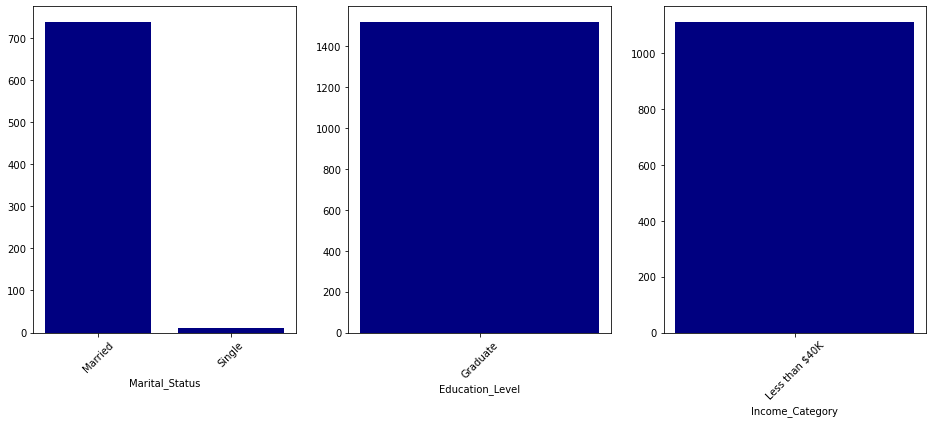

In [20]:
figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    values = pd.Series(imputed_values_list[count-1])
    plt.bar(x=values.value_counts().index,height=values.value_counts(),color = 'navy')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    count+=1

### Final Table Histogram

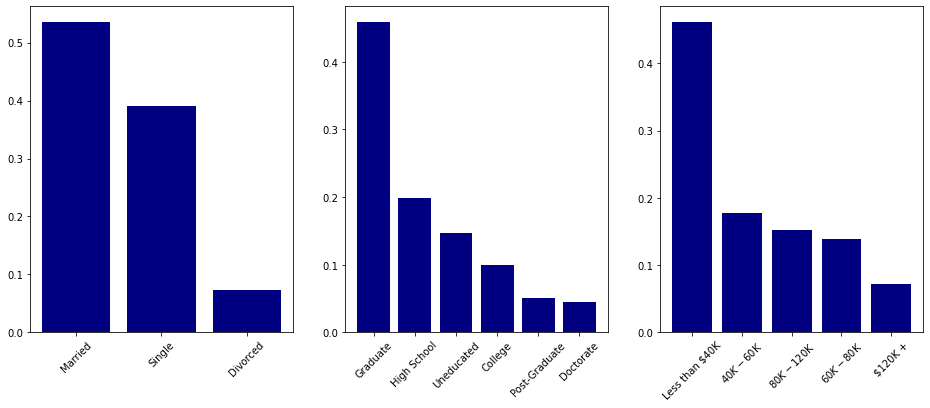

In [21]:
figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    plt.bar(x=bank_churners[col].value_counts().index,height=bank_churners[col].value_counts(normalize=True),color = 'navy')
    plt.xticks(rotation=45)
    count+=1

### Imputed Values Observations

**Histogram 1:**

`Marital_Status`: The vast majority of people who were missing `Marital_Status` were imuted as being 'Married'. Only a small portion were categorized as 'Single' and none were categorized as 'Divorced'.

`Education_Level`: Everyone was categorized as 'Graduate'.

`Income_Category`: Everyone was categorized as 'Less than $40K'.

**Histogram 2:**

The order of proportions was preserved throughout all the columns with missing values, but the categories that ranked the highest increased even more.

# 2.2 Univariate Analysis (Descriptive)

## 2.2.1 Categorical Data

In [22]:
categorical_columns

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

### Frequency Count

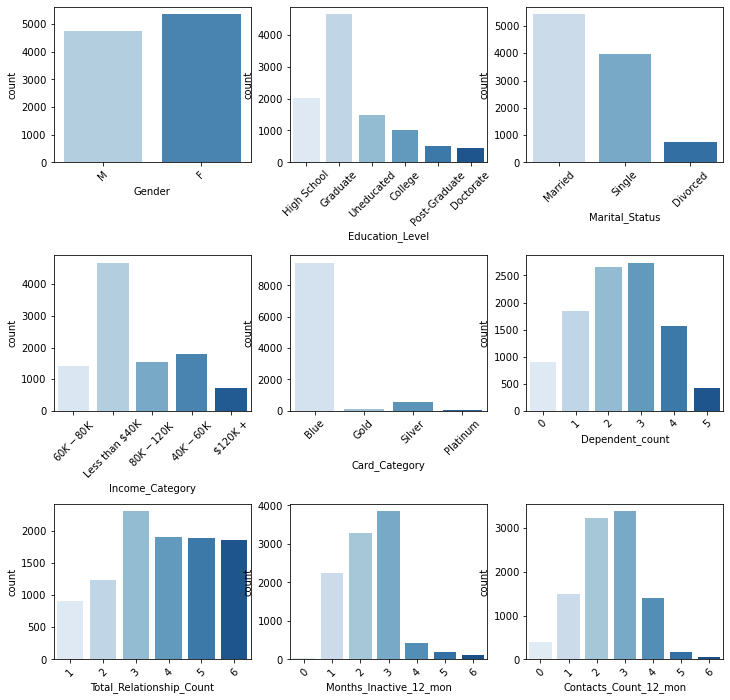

In [23]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
ax = ax.ravel()
count=0
for cat in categorical_columns:
    ar = sns.countplot(x=cat, data=bank_churners,ax=ax[count], palette='Blues')
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.6)
    count+=1 

### Frequency Count by Attrition

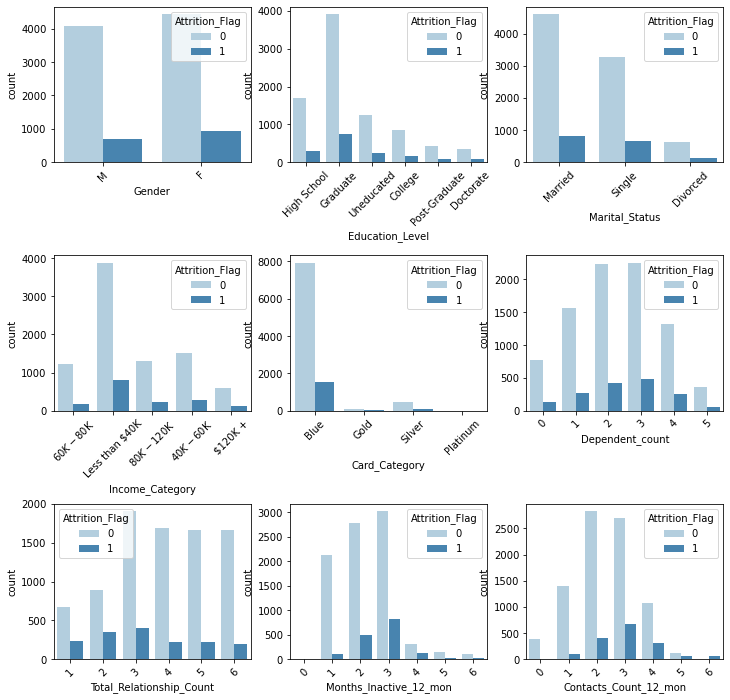

In [24]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
ax = ax.ravel()
count=0
for cat in categorical_columns:
    ar = sns.countplot(x=cat, data=bank_churners,ax=ax[count], palette='Blues',hue='Attrition_Flag')
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.6)
    count+=1 

### Frequency Percentage by Attrition

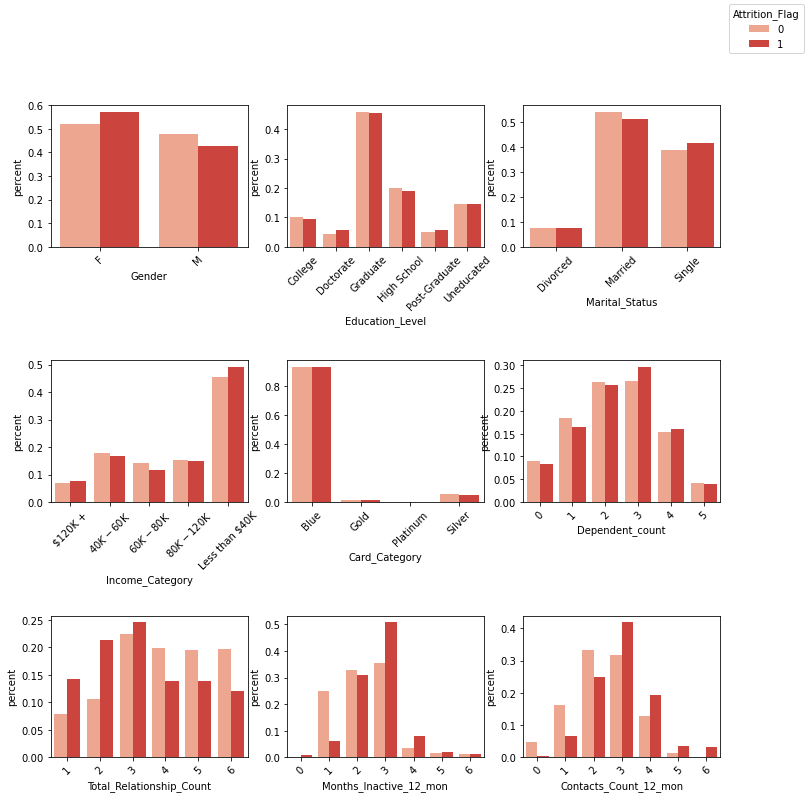

In [25]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
ax = ax.ravel()
count = 0
for cat in categorical_columns:
    category_grouped = (bank_churners.groupby(['Attrition_Flag',cat]).size() / bank_churners.groupby(['Attrition_Flag']).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.barplot(x=cat, hue='Attrition_Flag', y='percent', data=category_grouped,ax=ax[count], palette='Reds',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.8)
    ar.legend_.remove()
    count+=1 
handles, labels = ax[count-1].get_legend_handles_labels()
fig.legend(handles, labels,title='Attrition_Flag')

### Categorical Data Observations

** `Gender` : For both genders, the probability of churning is less than the probability of not churning. But it looks like males are less likely to churn than females. This means that gender may be a good predictor of churn.

`Education_Level` : The distribution looks fairly similar for both attrited and non-attrited users. This means that education level may not be a good predictor of churn.

`Marital_Status` : The distribution looks fairly similar for both attrited and non-attrited users. This means that marital status may not be a good predictor of churn.

`Income_Category` : The distribution looks fairly similar for both attrited and non-attrited users. This means that income category may not be a good predictor of churn.

`Card_Category` : The distribution looks fairly similar for both attrited and non-attrited users. This means that card category may not be a good predictor of churn.

`Dependent_Count` : The distribution looks fairly similar for both attrited and non-attrited users. This means that dependent count may not be a good predictor of churn.

** `Total_Relationship_Count` : The distribution for non-attrited users looks somewhat uniform out when the count is greater than 3 with count < 3 being the least probable. For attrited users, the probability of having a count 2 or 3 is the highest with the other categories being somewhat evenly less likely. This means that total relationship count may be a good predictor of churn.

** `Months_Inactive_12_mon` : A majority of non-attrited users were only inactive between 1 to 3 months in the last 12 months. The distribution for attrited customers peaked at 3 with 2 being the second highest and the other counts less probable. This means that months inactive may be a good predictor of churn.

** `Contacts_Count_12_mon` : The distribution of contacts_count_12_mon looks different for churned and non-churned users. This means Contact Count may be a good predictor of churn.

** Represents categorical columns that may be a good predictor of churn based off their histograms

In [105]:
associated_categorical_hist = ['Gender','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

## 2.2.2 Numerical Data

In [26]:
numerical_columns

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [27]:
bank_churners.describe()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count    10127.000000  10127.000000     10127.000000    10127.000000   
mean         0.160660     46.325960         2.346203       35.928409   
std          0.367235      8.016814         1.298908        7.986416   
min          0.000000     26.000000         0.000000       13.000000   
25%          0.000000     41.000000         1.000000       31.000000   
50%          0.000000     46.000000         2.000000       36.000000   
75%          0.000000     52.000000         3.000000       40.000000   
max          1.000000     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  missing_marital_status  \
count         10127.000000           10127.000000            10127.000000   
mean              0.712222               0.274894                0.073961   
std               0.238086               0.275691                0.261720   
min               0.000000               0.000000                0.000000   
25%               0.582000               0.023000                0.000000   
50%               0.702000               0.176000                0.000000   
75%               0.818000               0.503000                0.000000   
max               3.714000               0.999000                1.000000   

       missing_education_level  missing_income_category  
count             10127.000000             10127.000000  
mean                  0.149995                 0.109805  
std                   0.357084                 0.312663  
min                   0.000000                 0.000000  
25%                   0.000000                 0.000000  
50%                   0.000000                 0.000000  
75%                   0.000000                 0.000000  
max                   1.000000                 1.000000

## Distribution Plots

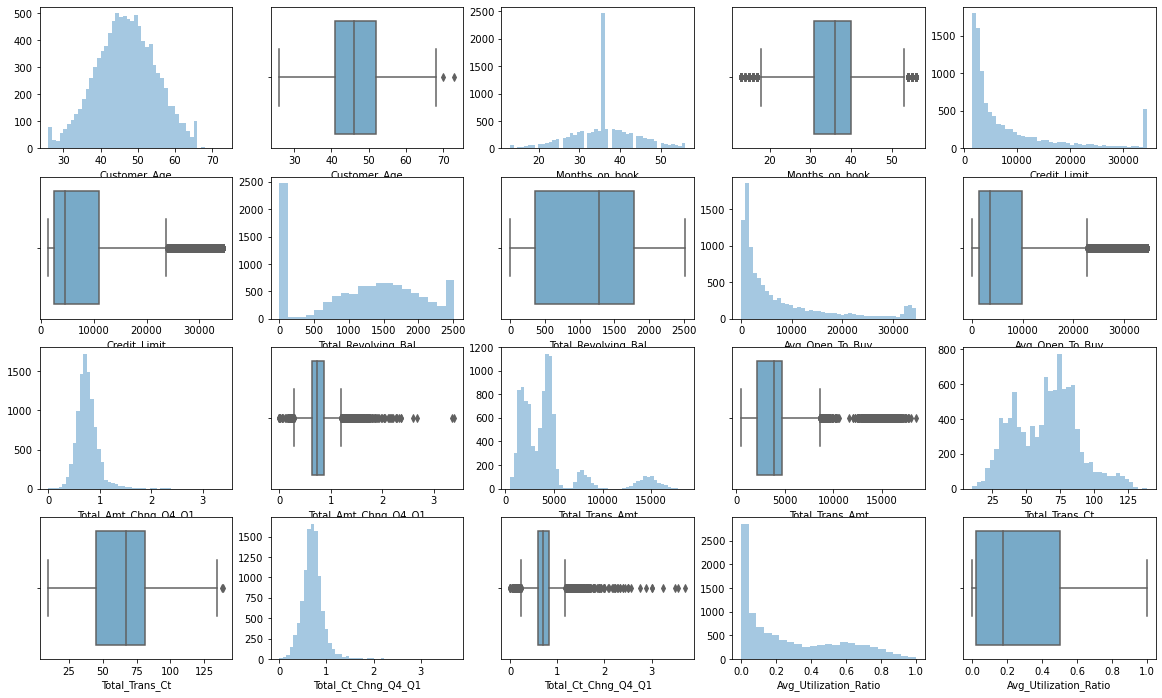

In [28]:
fig, ax = plt.subplots(4,5,figsize=(20,12))
ax = ax.ravel()
count=0
for num in numerical_columns:
    sns.distplot(a=bank_churners[num], ax=ax[count],kde=False)
    count+= 1
    sns.boxplot(x=num, data=bank_churners, ax=ax[count], palette='Blues')
    count+=1

## Distribution Plots by Attrition

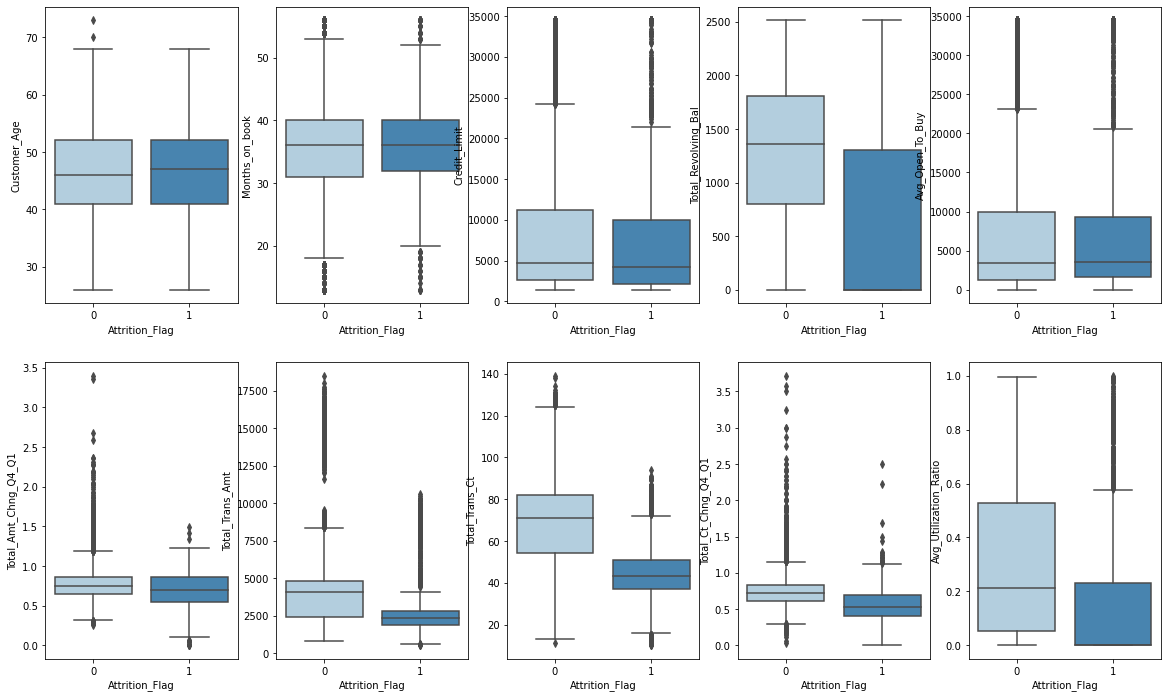

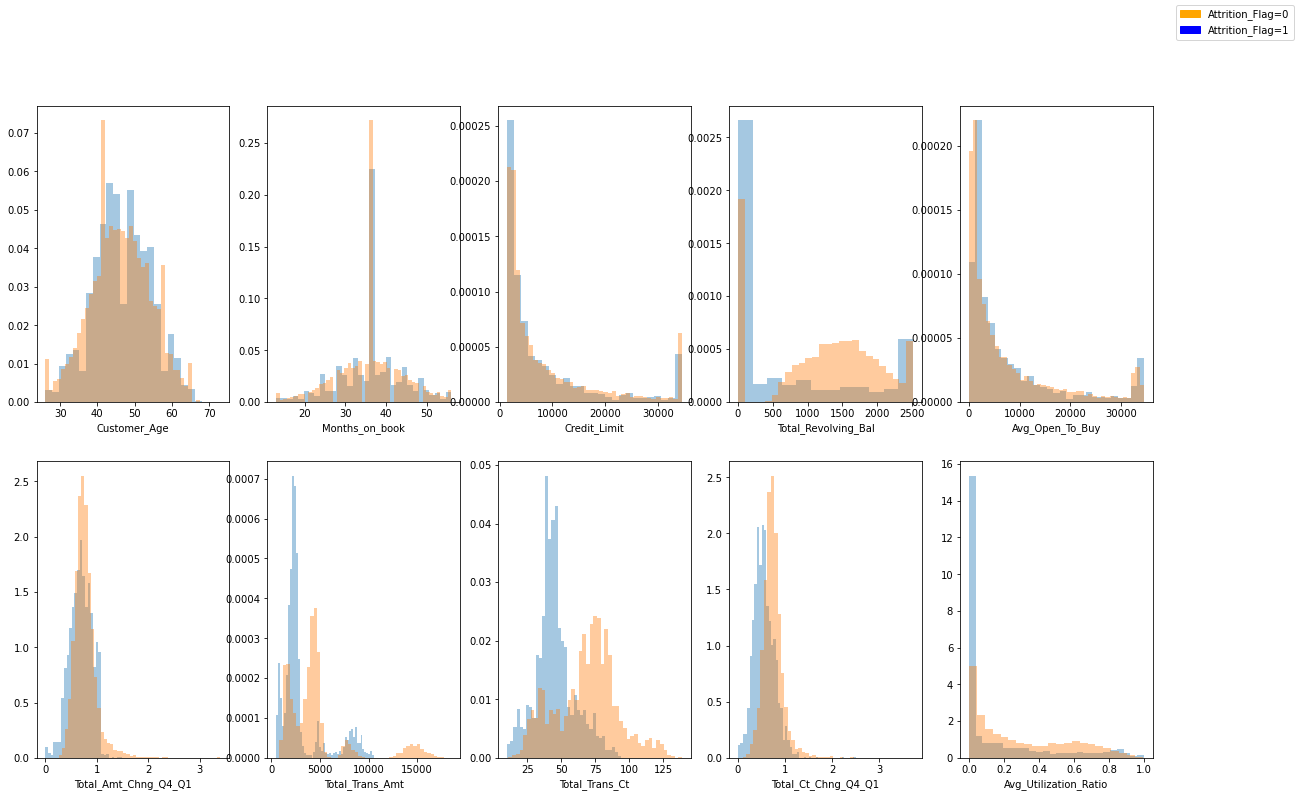

In [32]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count = 0
for n in numerical_columns:
    sns.boxplot(y=n, data=bank_churners, ax=ax[count], palette='Blues',x='Attrition_Flag')
    count+=1

    
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0
for num in numerical_columns:
    for a in [churned[num], not_churned[num]]:
        sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)
    count+=1
    
orange_patch = mpatches.Patch(color='orange', label='Attrition_Flag=0')
blue_patch = mpatches.Patch(color='blue', label='Attrition_Flag=1')
fig.legend(handles=[orange_patch,blue_patch])

In [103]:
correlated_numerical_with_attrition

Total_Relationship_Count   -0.149674
Months_Inactive_12_mon      0.171839
Contacts_Count_12_mon       0.189038
Total_Revolving_Bal        -0.240551
Total_Amt_Chng_Q4_Q1       -0.101962
Total_Trans_Amt            -0.223782
Total_Trans_Ct             -0.376115
Total_Ct_Chng_Q4_Q1        -0.312059
Avg_Utilization_Ratio      -0.240385
Name: Attrition_Flag, dtype: float64

In [117]:
associated_numerical_hist = ['Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

### Numerical Data Observations

`Customer_Age`: The distribution looks fairly similar for both attrited and non-attrited users. This means that education level may not be a good predictor of churn.

`Months_on_book`: The distribution looks fairly similar for both attrited and non-attrited users. This means that Months on book may not be a good predictor of churn. The distribution looks somewhat normal but there is a big spike at around 36 months for both customer types.

`Credit_Limit`: The distribution looks fairly similar for both attrited and non-attrited users. This means that credit limit may not be a good predictor of churn. Both distributions are highly right skewed, and there are some outliers towards the right tail that are prominent for both types of customers. A high percentage of both types also have a credit limit close to 0.

** `Total_Revolving_Bal`: There is a high percentage of customers who have a balance close to 0 which is probably due their credit limit being close to 0. For churned customers, the distribution seems like an inverse gaussian distribution with the majority being at the tails. This may be because they were planning to leave (balance close to 0) or they were just inactive (balance on the right tail). In the non-churned distribution, more customers are clustered around the mean. But, it looks as if there are still many on the left and right tails. Also, almost every user who has a total_revolving_bal less than ~500 and greater than 0 is attrited. This means that total revolving balance may be a good predictor of churn.

`Avg_Open_To_Buy`: The distribution looks fairly similar for both attrited and non-attrited users. This means that average open to buy may not be a good predictor of churn. Both distributions are skewed right meaning that most people have spent an amount close to their credit limit.

** `Total_Amt_Chng_Q4_Q1` : Both distributions are clustered where the vlaue is less than 1 but non-attrited users are somewhat right skewed. Almost everyone who had a value greater than 1 was not attrited meaning those who spent more during the fourth quarter compared to the first quarter did not churn. This means that total amount change may be a good predictor of churn.

** `Total_Trans_Amt` : It seems like there may be more than one mode (polymodal) for both distributions. Everyone who had an amount greater than approximately 11000 was non-attrited as well as those with a value about 3400- approximately 6000. This could indicate that our customers fall into some natural segmentation we can use. This means that total trans amount may be a good predictor of churn.

** `Total_Trans_Ct` : Although it would seem intutive that this count is reflective of the total_trans_amt, the distributions seem to be different. The mean and standard deviation for non-churned customers is higher than churned customers. This makes sense. Everyone who had a count > ~90 was not attrited. This means that total trans count may be a good predictor of churn.

** `Total_Ct_Chng_Q4_Q1` : Both distributions are heavily clustered under value < 1 and look somewhat normal. This means that a majority of customers, churned or not, made the almost the same amount of transactions in quarter 4 compared to quarter 1. This means that total count change may be a good predictor of churn.

** `Avg_Utilization_Ratio` : The majority of churned customers have a ratio of 0 almost everyone who doesn't have that value is an outlier. This means that a majority of users made verys small purchases in regards to their credit limit. Churned customers are more likely to spend close to 0 compared to non-churned customers. This means that average utilization ratio may be a good predictor of churn.

** Represents numerical columns that may be a good predictor of churn based off their histograms

# 2.3 Bivariate Analysis (Correlation)

## 2.3.1 Categorical vs. Categorical Data

### Countplot

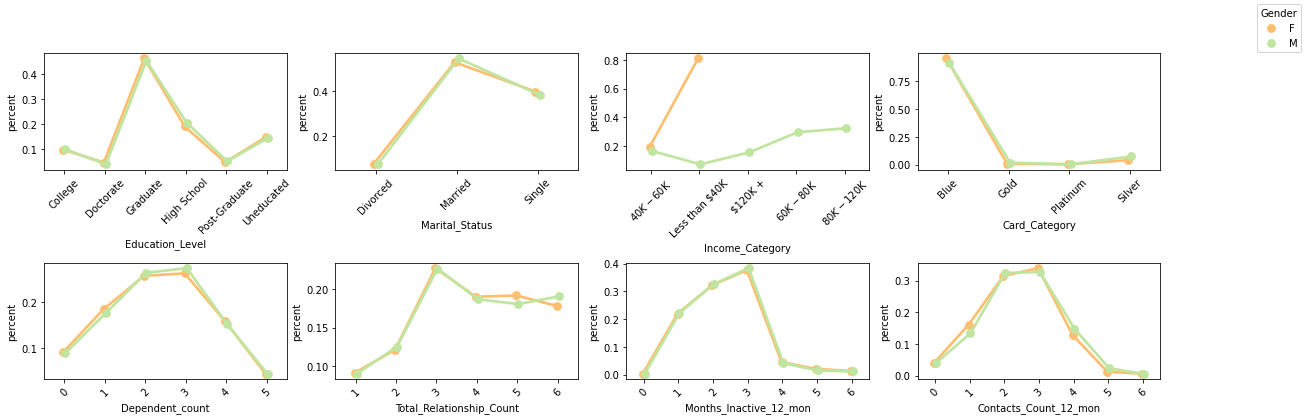

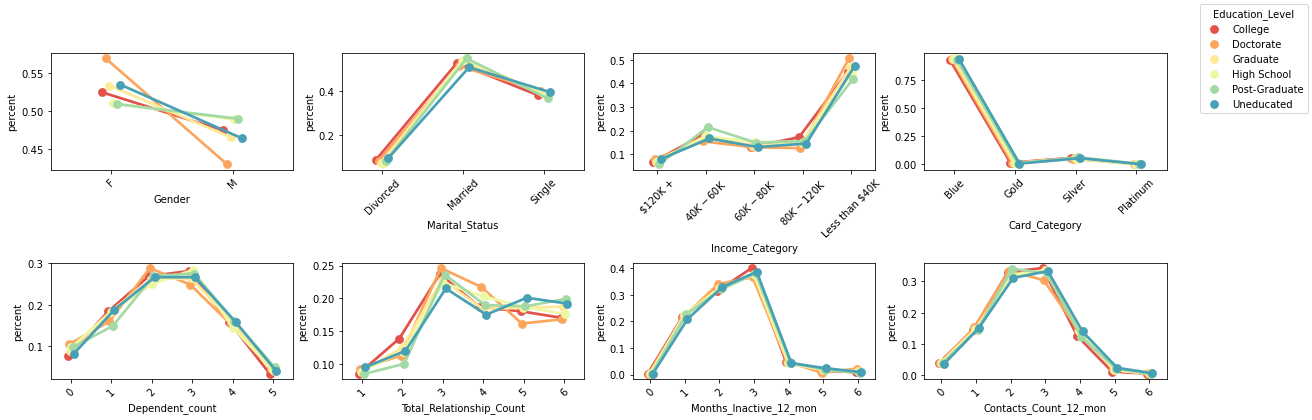

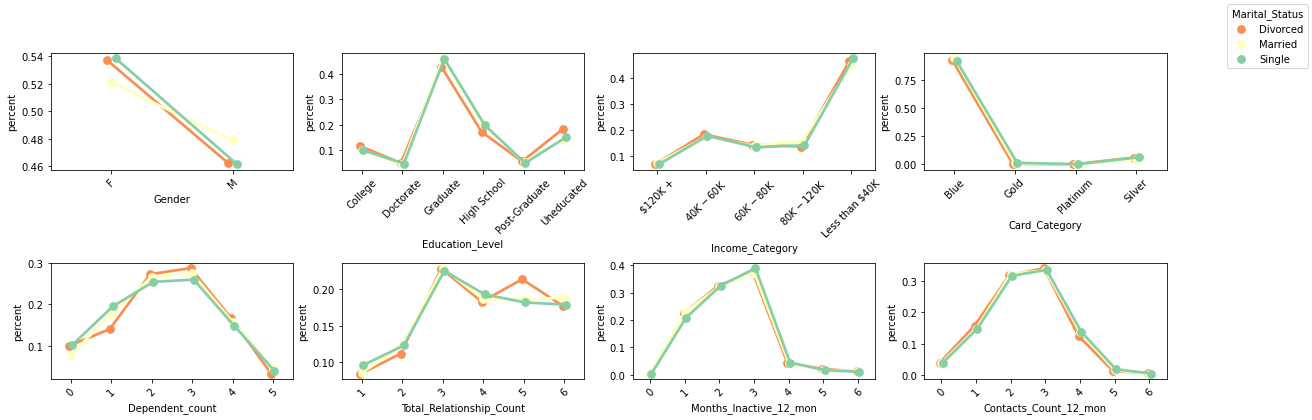

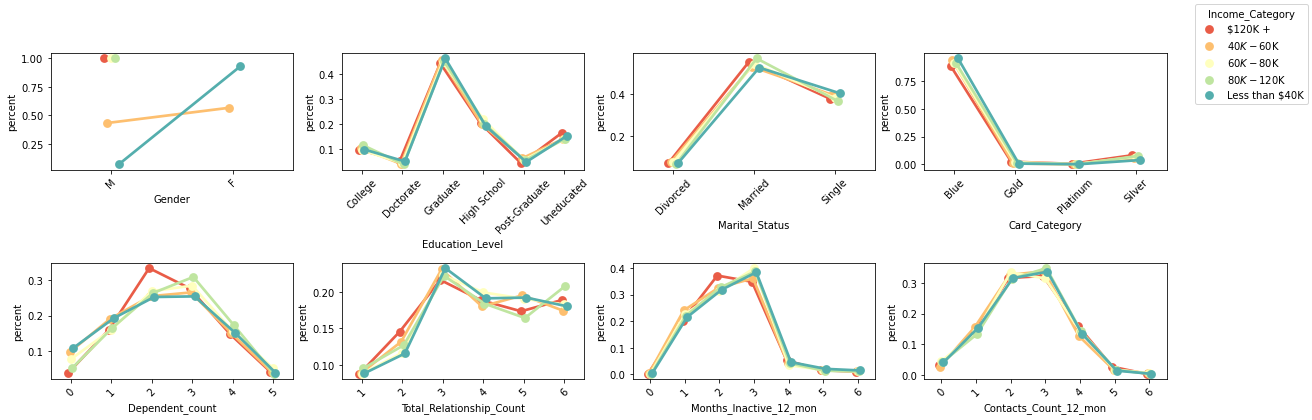

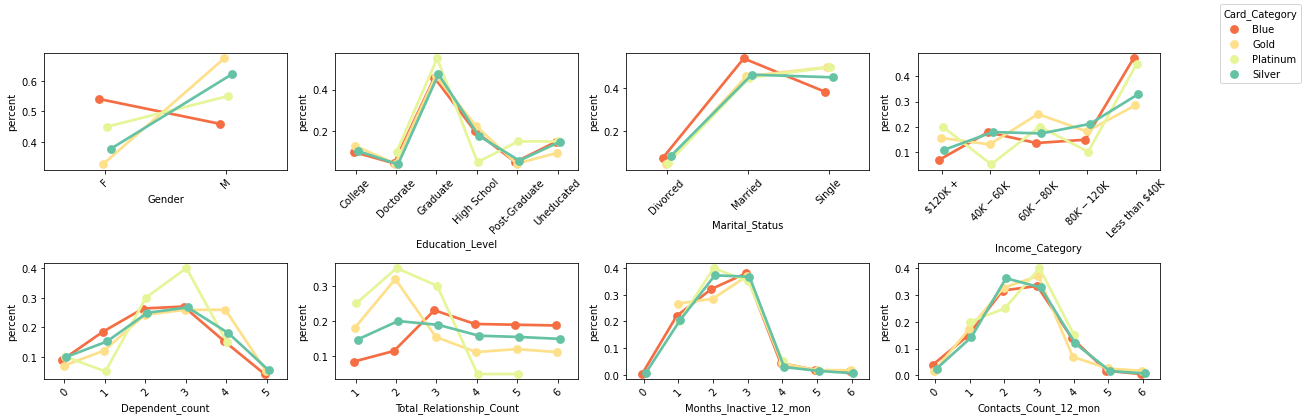

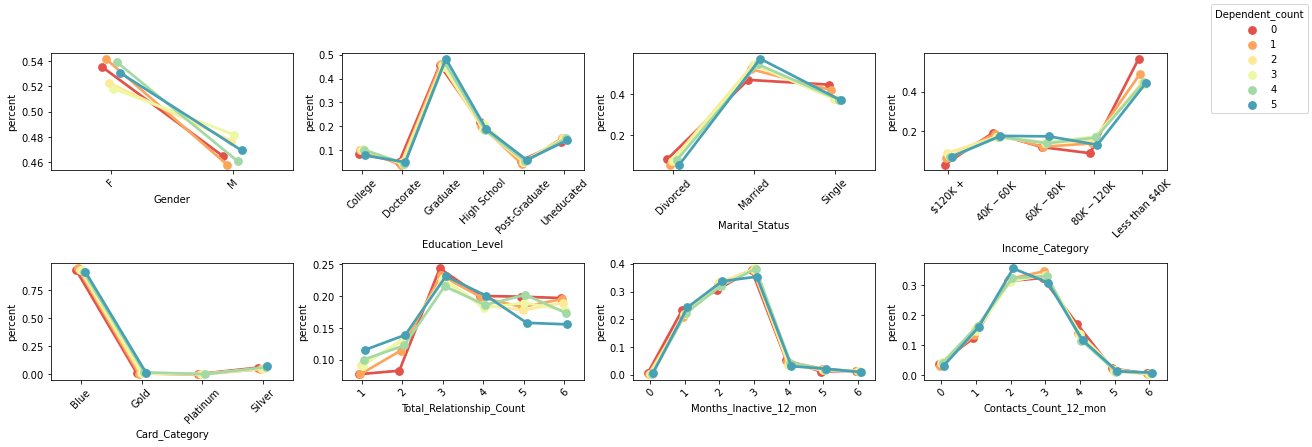

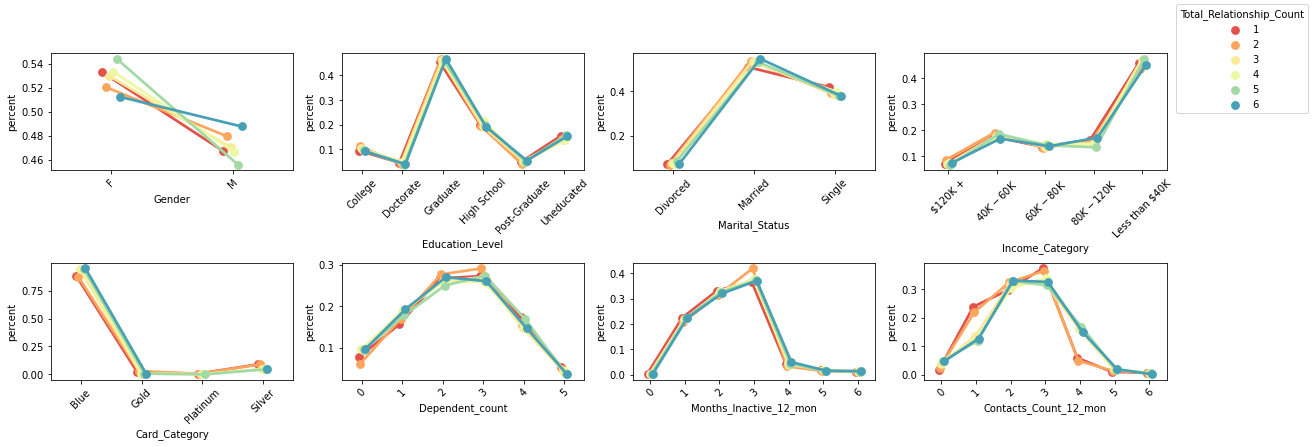

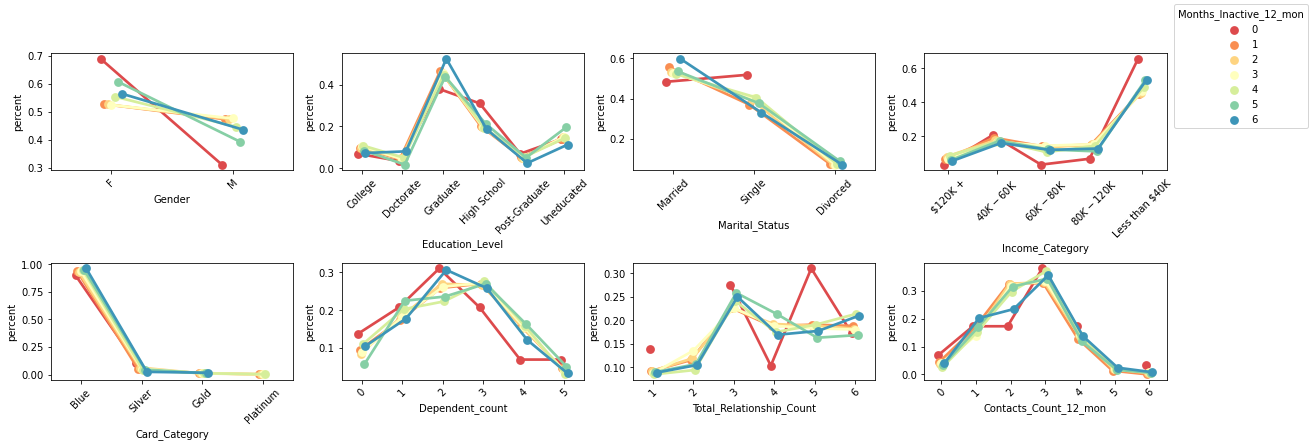

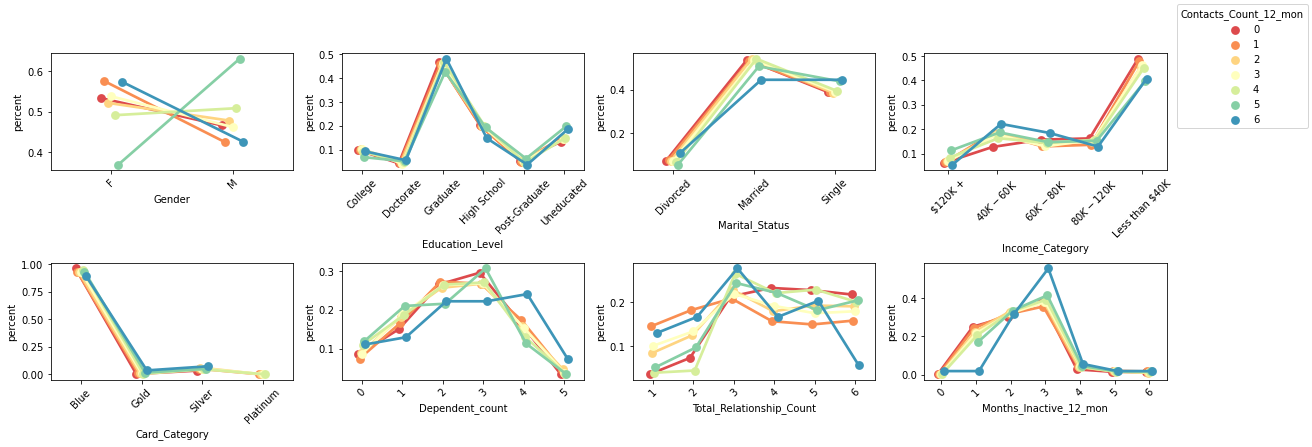

In [34]:
for cat in categorical_columns:
    fig, ax = plt.subplots(2,4,figsize=(20,6))
    ax = ax.ravel()
    count = 0
    for cat1 in categorical_columns:
        if cat1 != cat:
            category_grouped = (bank_churners.groupby([cat,cat1]).size() / bank_churners.groupby([cat]).size()).reset_index().rename({0:'percent'}, axis=1)
            ar = sns.pointplot(x=cat1, hue=cat, y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
            plt.setp(ax[count].get_xticklabels(), rotation=45)
            plt.subplots_adjust(hspace = 0.8)
            ar.legend_.remove()
            count+=1 

    handles, labels = ax[count-1].get_legend_handles_labels()
    fig.legend(handles, labels,title=cat)
   


### Chi-Squared Test

We want to see if these observations are statistically significant. We will compute a chi-squared test to see whether there is an association between any pair of categorical variables. 

In [35]:
associated_categorical_variables = []
alpha = .05
enumerated = list(itertools.combinations(categorical_columns, r=2))

for pair in enumerated:
    p_val = stats.chi2_contingency(pd.crosstab(bank_churners[pair[0]],bank_churners[pair[1]]))[1]
    if p_val < alpha:
        associated_categorical_variables.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with each other according to Chi-Squared Test: ')
associated_categorical_variables

Categorical Variables associated with each other according to Chi-Squared Test: 


[('Gender', 'Income_Category'),
 ('Gender', 'Card_Category'),
 ('Gender', 'Contacts_Count_12_mon'),
 ('Marital_Status', 'Card_Category'),
 ('Marital_Status', 'Dependent_count'),
 ('Income_Category', 'Card_Category'),
 ('Income_Category', 'Dependent_count'),
 ('Card_Category', 'Total_Relationship_Count'),
 ('Dependent_count', 'Total_Relationship_Count'),
 ('Dependent_count', 'Contacts_Count_12_mon'),
 ('Total_Relationship_Count', 'Contacts_Count_12_mon')]

### Chi-Squared Test and Countplot Observations
    
`Income_Category` vs. `Gender` : Every female claim they make less than \\$40K or \\$40K-\\$60K. In contrast, most males claim they make \\$80K-\\$120K, with \\$60K-\\$80K coming in second. Females tend to make less money than males.

`Gender` vs. `Card_Category`: Blue card holders are comprised of more females than male. But, for every other card category the reverse is true.

`Gender` vs. `Contacts_Count_12_mon`: Credit card users who were in contact with 5 people from the credit card company were majority female. Credit card users who were in contact with less than 5 or greater than 5 people from the credit company were majority male.

`Marital_Status` vs. `Card_Category`: People in the blue category are more likely to be married than people in the other categories. People in the blue category are less likely to be single than people in the other categories.

`Marital_Status` vs. `Dependent_count`: People who have dependents are more likely to be married than single. People who have zero dependents are somewhat equally likely to be married or single.

`Card_Category` vs. `Income_Category` : The distribution of incomes for each card category looks vastly different. Blue card holders have more people who make less than \$40K compared to other card categories. People who have more income have a higher card level.

`Income_Category` vs. `Dependent_count`: People who make $120K+ are more likely to have two dependents than any other income level.

`Card_Category` vs. `Total_Relationship_Count` : Platinum members tend to buy only one to three products. The lower the card status, the more spread out the total relationship count distribution is from one to six products. This means there may be a relationship between card category and total relationship count.

`Dependent_count` vs. `Total_Relationship_Count`: People who have less dependents are more likely to purchase more products with the credit card company.

`Dependent_count` vs. `Contacts_Count_12_mon`: People who had more contact with the company are more likely to have more dependents.

`Total_Relationship_Count` vs. `Months_Inactive_12_mon` : The distribution of products owned by a customer is very different for customers who were inactive 0 months out of the last twelve months compared to the rest of customers. People who were active for all months of the past year had a different relationship count pattern than any other type of consumer.

## 2.3.1 Target vs. Categorical Data

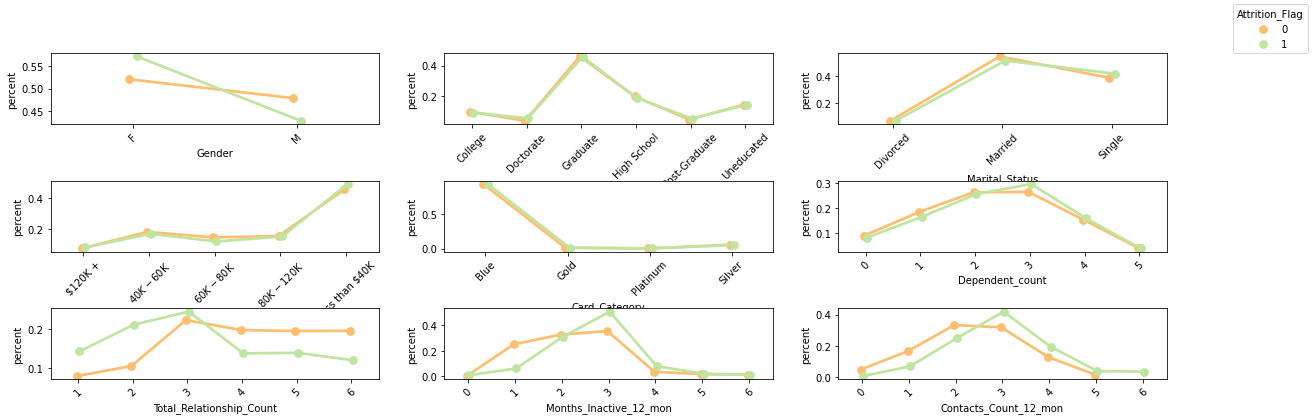

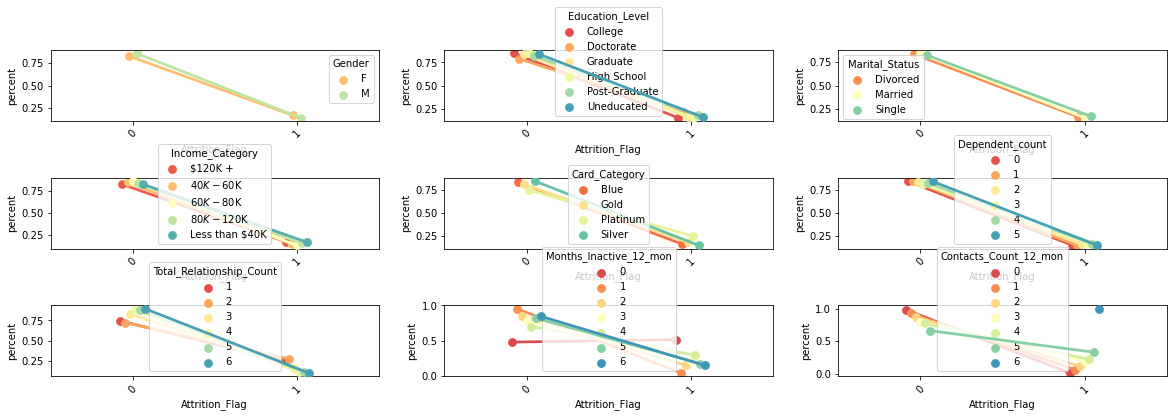

In [41]:
count=0
fig, ax = plt.subplots(3,3,figsize=(20,6))
ax = ax.ravel()
for cat1 in categorical_columns:
    category_grouped = (bank_churners.groupby(['Attrition_Flag',cat1]).size() / bank_churners.groupby(['Attrition_Flag']).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.pointplot(x=cat1, hue='Attrition_Flag', y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.8)
    ar.legend_.remove()
    count+=1 
handles, labels = ax[count-1].get_legend_handles_labels()
fig.legend(handles, labels,title='Attrition_Flag')

count=0
fig, ax = plt.subplots(3,3,figsize=(20,6))
ax = ax.ravel()
for cat1 in categorical_columns:
    category_grouped = (bank_churners.groupby(['Attrition_Flag',cat1]).size() / bank_churners.groupby([cat1]).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.pointplot(x='Attrition_Flag', hue=cat1, y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.8)
    count+=1 

In [37]:
associated_categorical_variables_with_target = []
alpha = .05

for cat in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(bank_churners[cat],bank_churners['Attrition_Flag']))[1]
    if p_val < alpha:
        associated_categorical_variables_with_target.append(cat)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with Attrition_Flag: ')
associated_categorical_variables_with_target

Categorical Variables associated with Attrition_Flag: 


['Gender',
 'Education_Level',
 'Income_Category',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

### Chi-Squared Test and Countplot Results

`Gender`: People who attrite are more likely to be female than male.

`Education_Level`: People who attrite are less educated than those who don't attrite.

`Income_Category`: People who attrite are less likely to be married.

`Total_Relationship_Count`: People who bought more products are less likely to attrite.

`Months_Inactive_12_mon`: As months inactive increases, so does the probability of attriting.

`Contacts_Count_12_mon`: Consumers who were in contact with more people in the credit card company are more likely to attrite.

## 2.3.2 Numerical vs. Numerical

### Scatterplots

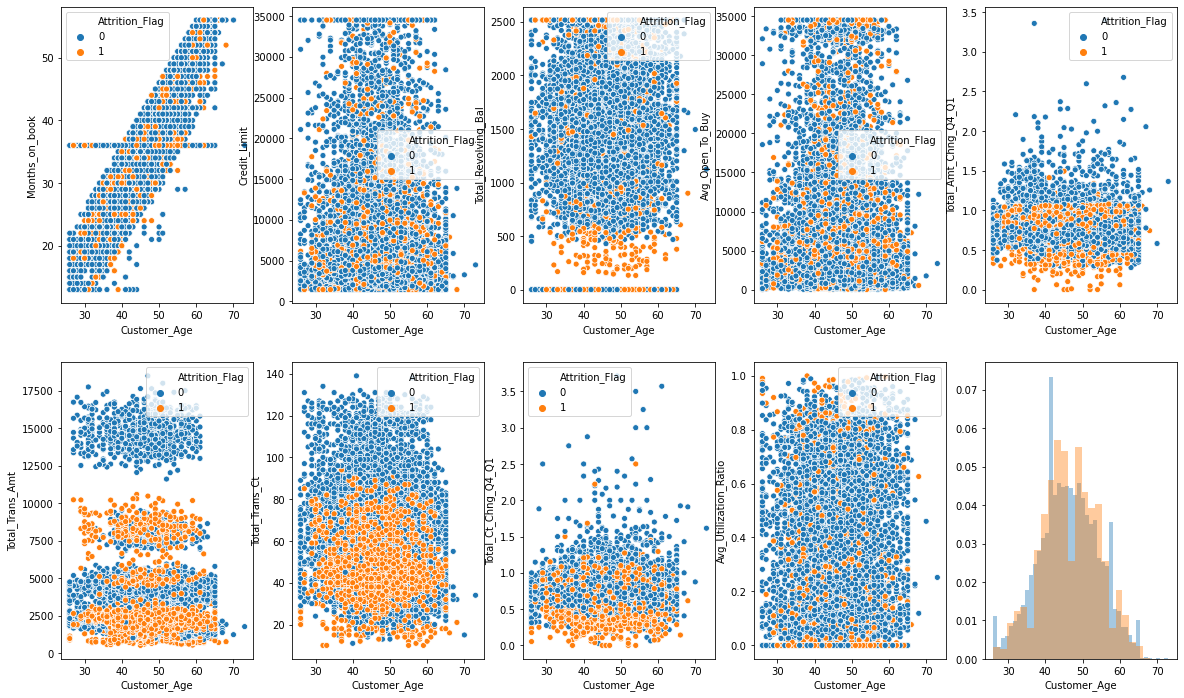

In [42]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Customer_Age'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

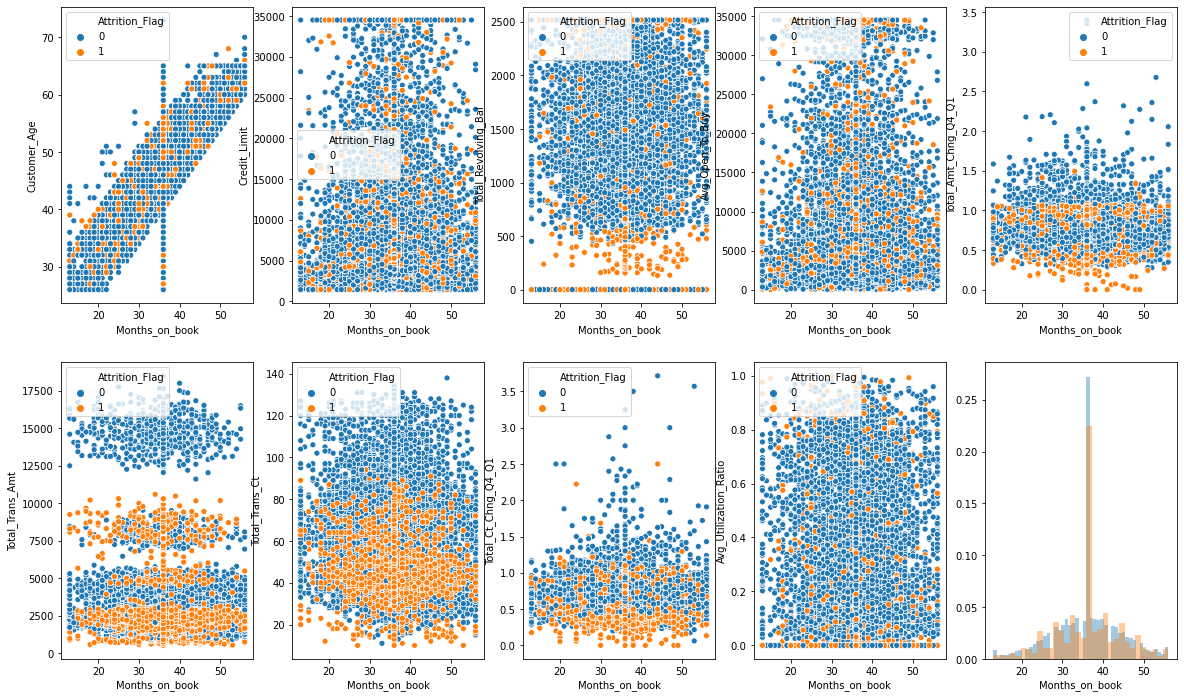

In [43]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Months_on_book'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Credit_Limit'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Revolving_Bal'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Avg_Open_To_Buy'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Trans_Amt'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
numerical_columns

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Trans_Ct'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Amt_Chng_Q4_Q1'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Ct_Chng_Q4_Q1'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Avg_Utilization_Ratio'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

### `Credit_Limit` Observations

`Avg_Open_To_Buy` : There is a positive linear relationship between the two variables with correlation close to 1.

`Avg_Utilization_Ratio` : There is a negative relationship between the two variables.

### `Months_on_book` Observations

`Customer_Age` : There seems to be a linear postive relationship between customer_age and months_on_book.

### `Total_Trans_Ct` Observations

`Total_Trans_Amt` : There is a positive relationship between the two variables.

### `Avg_Open_To_Buy` Observations

`Credit_Limit` : Positive linear relationship with correlation close to 1.
    
`Avg_Utilization_Ratio` : Negative relationship.

### `Total_Trans_Amt` Observations

`Total_Trans_Ct` : There is a positive relationship.

### `Total_Amt_Chng_Q4_Q1` Observations

`Total_Trans_Amt` : Almost everyone who was attrited had a trans amount less than than ~12000 and chng less than 1, with very few outliers.

### `Total_Revolving_Bal` Observations

`Avg_Utilization_Ratio` : There is a positive relationship. 

`Total_Trans_Amt` : People who had 0 balance and trans amount < 12500 were attrited and those who had 0 balance and trans amount >= 12500 were non-attrited. 

### `Total_Ct_Chng_Q4_Q1` Observations

`Total_Amt_Chng_Q4_Q1` : There is a positive relationship between the two variables.

### `Avg_Utilization_Ratio` Observations

`Credit_Limit` : There is a negative relationship.
    
`Total_Revolving_Bal` : There is a positive relationship.

### `Customer_Age` Insights

`Months_on_book` : There seems to be a linear postive relationship between customer_age and months_on_book.

### Scatterplot Observations

`Credit_Limit` vs. `Avg_Open_To_Buy` : There is a positive linear relationship between the two variables with correlation close to 1.

`Credit_Limit` vs. `Avg_Utilization_Ratio` : There is a negative relationship between the two variables. 

`Months_on_book` vs. `Customer_Age` : There seems to be a linear postive relationship between customer_age and months_on_book.

`Total_Trans_Ct` vs `Total_Trans_Amt` : There is a positive relationship between the two variables.

`Avg_Open_To_Buy` vs. `Credit_Limit` : Positive linear relationship with correlation close to 1.

`Avg_Open_To_Buy` vs. `Avg_Utilization_Ratio` : Negative relationship.

`Total_Trans_Amt` vs. `Total_Trans_Ct` : There is a positive relationship.

`Total_Amt_Chng_Q4_Q1` vs. `Total_Trans_Amt` : Almost everyone who was attrited had a trans amount less than than ~12000 and chng less than 1, with very few outliers.

`Total_Revolving_Bal` vs. `Avg_Utilization_Ratio` : There is a positive relationship. 

`Total_Revolving_Bal` vs. `Total_Trans_Amt` : People who had 0 balance and trans amount < 12500 were attrited and those who had 0 balance and trans amount >= 12500 were non-attrited. 

`Total_Ct_Chng_Q4_Q1` vs. `Total_Amt_Chng_Q4_Q1` : There is a positive relationship between the two variables.

### Correlation Heatmaps

We will be assessing Spearman correlation to account for non-linear relationships.

In [123]:
bank_churners.corr()**2

Attrition_Flag  Customer_Age  Dependent_count  \
Attrition_Flag              1.000000e+00      0.000331         0.000361   
Customer_Age                3.313543e-04      1.000000         0.014946   
Dependent_count             3.606427e-04      0.014946         1.000000   
Months_on_book              1.873299e-04      0.622383         0.010622   
Total_Relationship_Count    2.250157e-02      0.000119         0.001527   
Months_Inactive_12_mon      2.324064e-02      0.002955         0.000116   
Contacts_Count_12_mon       4.181637e-02      0.000340         0.001641   
Credit_Limit                5.699199e-04      0.000006         0.004633   
Total_Revolving_Bal         6.919682e-02      0.000218         0.000007   
Avg_Open_To_Buy             8.126918e-08      0.000001         0.004664   
Total_Amt_Chng_Q4_Q1        1.717747e-02      0.003849         0.001256   
Total_Trans_Amt             2.842541e-02      0.002157         0.000627   
Total_Trans_Ct              1.379400e-01      0.004502         0.002491   
Total_Ct_Chng_Q4_Q1         8.413133e-02      0.000147         0.000123   
Avg_Utilization_Ratio       3.183025e-02      0.000051         0.001379   
missing_marital_status      7.928567e-05      0.000713         0.001742   
missing_education_level     8.109883e-05      0.000029         0.000024   
missing_income_category     5.153394e-05      0.000005         0.000369   
is_36                       4.620678e-04      0.000145         0.000654   

                          Months_on_book  Total_Relationship_Count  \
Attrition_Flag                  0.000187              2.250157e-02   
Customer_Age                    0.622383              1.194883e-04   
Dependent_count                 0.010622              1.526964e-03   
Months_on_book                  1.000000              8.469669e-05   
Total_Relationship_Count        0.000085              1.000000e+00   
Months_Inactive_12_mon          0.005500              1.350840e-05   
Contacts_Count_12_mon           0.000116              3.047389e-03   
Credit_Limit                    0.000056              5.095935e-03   
Total_Revolving_Bal             0.000074              1.883989e-04   
Avg_Open_To_Buy                 0.000045              5.270958e-03   
Total_Amt_Chng_Q4_Q1            0.002397              2.511878e-03   
Total_Trans_Amt                 0.001489              1.205679e-01   
Total_Trans_Ct                  0.002482              5.851118e-02   
Total_Ct_Chng_Q4_Q1             0.000198              1.667183e-03   
Avg_Utilization_Ratio           0.000057              4.578265e-03   
missing_marital_status          0.000684              8.790301e-05   
missing_education_level         0.000013              1.575533e-05   
missing_income_category         0.000059              2.399709e-07   
is_36                           0.000026              1.213291e-04   

                          Months_Inactive_12_mon  Contacts_Count_12_mon  \
Attrition_Flag                          0.023241           4.181637e-02   
Customer_Age                            0.002955           3.404709e-04   
Dependent_count                         0.000116           1.640652e-03   
Months_on_book                          0.005500           1.160894e-04   
Total_Relationship_Count                0.000014           3.047389e-03   
Months_Inactive_12_mon                  1.000000           8.698317e-04   
Contacts_Count_12_mon                   0.000870           1.000000e+00   
Credit_Limit                            0.000416           4.333480e-04   
Total_Revolving_Bal                     0.001782           2.906583e-03   
Avg_Open_To_Buy                         0.000276           6.577153e-04   
Total_Amt_Chng_Q4_Q1                    0.001040           5.975637e-04   
Total_Trans_Amt                         0.001368           1.271796e-02   
Total_Trans_Ct                          0.001831           2.316868e-02   
Total_Ct_Chng_Q4_Q1                     0.001520           9.024414e-03   

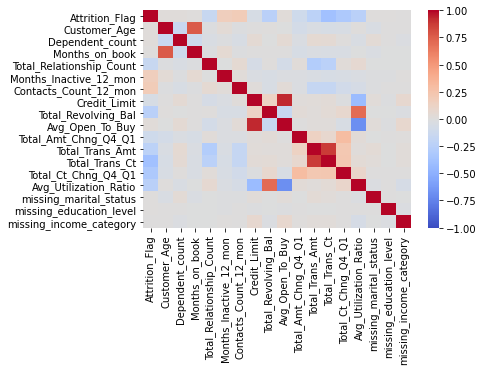

In [44]:
sns.heatmap(bank_churners.corr(method='spearman'), vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

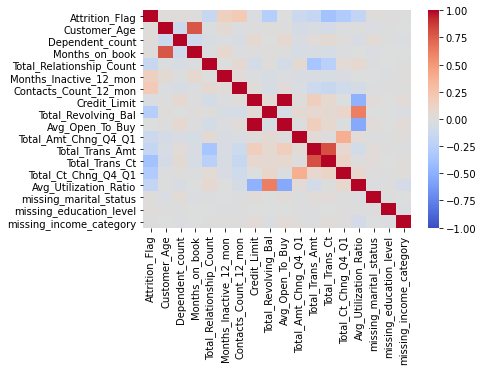

In [45]:
sns.heatmap(bank_churners.corr(method='pearson'), vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

There doesn't seem to be too big of a difference in correlation heatmpas so will use Spearman correlation.

In [50]:
s = bank_churners.corr('spearman').unstack()

s_sorted = s.sort_values(kind="quicksort",ascending=False)

associated_numerical_positive = s_sorted[(s_sorted.values < 1) & (s_sorted.values >.50) & (s_sorted.index.get_level_values(0) !='Attrition_Flag') & (s_sorted.index.get_level_values(1) !='Attrition_Flag')]
print(associated_numerical_positive)

associated_numerical_negative = s_sorted[(s_sorted.values < 0) & (s_sorted.values <-.5) & (s_sorted.index.get_level_values(0) !='Attrition_Flag') & (s_sorted.index.get_level_values(1) !='Attrition_Flag')]
print(associated_numerical_negative)

Credit_Limit           Avg_Open_To_Buy          0.931431
Avg_Open_To_Buy        Credit_Limit             0.931431
Total_Trans_Ct         Total_Trans_Amt          0.879725
Total_Trans_Amt        Total_Trans_Ct           0.879725
Customer_Age           Months_on_book           0.768901
Months_on_book         Customer_Age             0.768901
Avg_Utilization_Ratio  Total_Revolving_Bal      0.708607
Total_Revolving_Bal    Avg_Utilization_Ratio    0.708607
dtype: float64
Avg_Open_To_Buy        Avg_Utilization_Ratio   -0.685716
Avg_Utilization_Ratio  Avg_Open_To_Buy         -0.685716
dtype: float64


### Numerical vs. Numerical Correlated Features:

`Credit_Limit` vs. `Avg_Open_To_Buy`: 0.931431 There is a positive linear relationship between the two variables with correlation close to 1. This indicates that people who have a higher credit limit have more unspent credit.

`Total_Trans_Ct` vs. `Total_Trans_Amt`: 0.879725 There is a positive relationship between the two variables. Those who spend a large amount of credit make more transactions.

`Customer_Age` vs. `Months_on_book`: 0.768901 There is a linear postive relationship between customer_age and months_on_book.Older customers have a longer relationship with the company.

`Total_Revolving_Bal` vs. `Avg_Utilization_Ratio`: (0.708607) Total_Revolving Balance is used in the equation for Avg_Utilization. People who spend more credit have a higher average utilization ratio.

`Avg_Utilization_Ratio` vs`Avg_Open_To_Buy` -0.685716 : People who spend less of their credit limit have more credit left to spend.


### Less Correlated Features:

`Avg_Utilization_Ratio` vs`Credit_Limit` -0.416959: People who spend less of their credit have more credit.

`Total_Relationship_Count` vs`Total_Trans_Amt` -0.279113: People who have a longer relationship with the bank spend less credit.

`Total_Relationship_Count` vs`Total_Trans_Ct` -0.226808: People who have a longer relationship with the bank make less transactions.

`Total_Trans_Ct` vs`Contacts_Count_12_mon` -0.168413: People who make more transactions were inactive for less months compared to those who made less transactions.

`Contacts_Count_12_mon` vs`Total_Trans_Amt` -0.167372: People who spend more credit had less contact with the bank.

`Avg_Open_To_Buy` vs`Total_Revolving_Bal` -0.154165: People who spend more of their credit have less credit to spend.

`Total_Ct_Chng_Q4_Q1` vs. `Total_Amt_Chng_Q4_Q1`: 0.301981 People who spend more in the fourth quarter compared to the first make more transactions in the fourth quarter than the first.

`Total_Trans_Ct` vs. `Total_Ct_Chng_Q4_Q1`: 0.233448: People who make more transactions in general spend their money more in the fourth quarter compared to the first. People who make less transactions do not increase the number of transactions made in the fourth quarter compared to the first.

`Total_Ct_Chng_Q4_Q1` vs. `Total_Trans_Amt`: 0.222688: People who make more transactions in the fourth quarter compared to the first spend more credit in general.

In [51]:
correlated_numerical_with_attrition = bank_churners.corr('spearman')['Attrition_Flag']
correlated_numerical_with_attrition = correlated_numerical_with_attrition[(correlated_numerical_with_attrition.values < 1) & (abs(correlated_numerical_with_attrition.values) >.10)]#.sort_values(ascending=False)
correlated_numerical_with_attrition

Total_Relationship_Count   -0.149674
Months_Inactive_12_mon      0.171839
Contacts_Count_12_mon       0.189038
Total_Revolving_Bal        -0.240551
Total_Amt_Chng_Q4_Q1       -0.101962
Total_Trans_Amt            -0.223782
Total_Trans_Ct             -0.376115
Total_Ct_Chng_Q4_Q1        -0.312059
Avg_Utilization_Ratio      -0.240385
Name: Attrition_Flag, dtype: float64

In [129]:
bank_churners.corr('spearman')['Attrition_Flag'].sort_values()

Total_Trans_Ct             -0.376115
Total_Ct_Chng_Q4_Q1        -0.312059
Total_Revolving_Bal        -0.240551
Avg_Utilization_Ratio      -0.240385
Total_Trans_Amt            -0.223782
Total_Relationship_Count   -0.149674
Total_Amt_Chng_Q4_Q1       -0.101962
Credit_Limit               -0.050910
missing_income_category     0.007179
missing_marital_status      0.008904
missing_education_level     0.009005
Months_on_book              0.015300
Customer_Age                0.017508
Dependent_count             0.020983
is_36                       0.021496
Avg_Open_To_Buy             0.027500
Months_Inactive_12_mon      0.171839
Contacts_Count_12_mon       0.189038
Attrition_Flag              1.000000
Name: Attrition_Flag, dtype: float64

### Numerical vs. Target Correlation Observations:

`Total_Trans_Ct` -0.376115: People who make less transactions are more likely to attrite.

`Total_Ct_Chng_Q4_Q1` -0.312059: People who make more transactions in the fourth quarter compared to the first quarter are less likely to attrite.

`Total_Revolving_Bal` -0.240551: People who spend more credit are less likely to attrite.

`Avg_Utilization_Ratio` -0.240385: People who spend a larger proportion of their credit limit are less likely to attrite.

`Total_Trans_Amt` -0.223782: People who spend more credit are less likely to attrite.

`Contacts_Count_12_mon` 0.189038: People who have more contact with the bank in the last twelve months are more likely to attrite.

`Months_Inactive_12_mon` 0.171839: People who were inactive for more months of the last year are more likely to attrite.

### Normality Test

Parametric test requires normality of data. Let's see if that's true.

In [ ]:
alpha = .05
for num in numerical_columns:
    combined_stat = stats.shapiro(bank_churners[num])[1]
    if combined_stat < alpha:
        print( num, 'Distribution IS NOT normally distributed with p-value of ', combined_stat)
    else:
        print(num, 'Distribution IS normally distributed with p-value of ', combined_stat)
    print()

###  Wilcoxon Rank-Sum Test

Since not normal, we will compute wilcoxon rank-sum test to see if medians are same for attrited variables.

In [52]:
related_columns = []
for col_name in numerical_columns:
    pval = stats.ranksums(churned[col_name], not_churned[col_name]).pvalue
    if pval < alpha:
        related_columns.append(col_name)
print('Numerical Features with different medians for churned and non-churned customers: ')
related_columns

Numerical Features with different medians for churned and non-churned customers: 


['Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [53]:
correlated_numerical_with_attrition

Total_Relationship_Count   -0.149674
Months_Inactive_12_mon      0.171839
Contacts_Count_12_mon       0.189038
Total_Revolving_Bal        -0.240551
Total_Amt_Chng_Q4_Q1       -0.101962
Total_Trans_Amt            -0.223782
Total_Trans_Ct             -0.376115
Total_Ct_Chng_Q4_Q1        -0.312059
Avg_Utilization_Ratio      -0.240385
Name: Attrition_Flag, dtype: float64

### Comparing Correlation Results with Wilcoxon Rank-Sum Results

Not Surprising Results:

`Avg_Utilization_Ratio`, `Total_Ct_Chng_Q4_Q1`,`Total_Trans_Ct`, `Total_Trans_Amt` and `Total_Revolving_Bal`: These attributes were important in both statistics for determining attrition. People who increasingly spend more of their credit limit within the last year are less likely to attrite.

`Months_Inactive_12_mon` and `Contacts_Count_12_mon`: People who were more inactive in the last 12 months and were in contact with more people in the credit card company were more associated with a higher Attrition_Rate, but the medians did not differ enough to be statistically significant. This makes sense as their correlation with the target variable were less than those above.

`Credit_Limit`,`Total_Revolving_Bal`, and `Avg_Open_To_Buy`: The difference in median values for churned and non-churned customers for all of these attributes were statitically significant, but did not have a strong correlation with attrition rate.

In [54]:
bank_churners[categorical_columns].nunique().sort_values()

Gender                      2
Marital_Status              3
Card_Category               4
Income_Category             5
Education_Level             6
Dependent_count             6
Total_Relationship_Count    6
Months_Inactive_12_mon      7
Contacts_Count_12_mon       7
dtype: int64

In [56]:
bank_churners.Marital_Status.value_counts()

Married     5425
Single      3954
Divorced     748
Name: Marital_Status, dtype: int64

In [62]:
associated_categorical_and_numerical_variables = []

cat = 'Gender'
for num in numerical_columns:
    female = bank_churners[bank_churners[cat] == 'F']
    male = bank_churners[bank_churners[cat] == 'M']
    pval = stats.kruskal(female[num].values,male[num].values).pvalue
    if pval < alpha:
       # print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
        associated_categorical_and_numerical_variables.append((cat,num,1))
   
three_categories = ['Marital_Status']
for cat in three_categories:
    cats = bank_churners[cat].value_counts().index
    for num in numerical_columns:
        cat1 = bank_churners[bank_churners[cat] == cats[0]][num].values
        cat2 = bank_churners[bank_churners[cat] == cats[1]][num].values
        cat3 = bank_churners[bank_churners[cat] == cats[2]][num].values
        pval = stats.kruskal(cat1,cat2,cat3).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1))
        
        
four_categories = ['Card_Category']
for cat in four_categories:
    cats = bank_churners[cat].value_counts().index
    for num in numerical_columns:
        cat1 = bank_churners[bank_churners[cat] == cats[0]][num].values
        cat2 = bank_churners[bank_churners[cat] == cats[1]][num].values
        cat3 = bank_churners[bank_churners[cat] == cats[2]][num].values
        cat4 = bank_churners[bank_churners[cat] == cats[3]][num].values
        pval = stats.kruskal(cat1,cat2,cat3,cat4).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1))
            
five_categories = ['Income_Category']
for cat in five_categories:
    cats = bank_churners[cat].value_counts().index
    for num in numerical_columns:
        cat1 = bank_churners[bank_churners[cat] == cats[0]][num].values
        cat2 = bank_churners[bank_churners[cat] == cats[1]][num].values
        cat3 = bank_churners[bank_churners[cat] == cats[2]][num].values
        cat4 = bank_churners[bank_churners[cat] == cats[3]][num].values
        pval = stats.kruskal(cat1,cat2,cat3,cat4).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1))
            
six_categories = ['Dependent_count','Total_Relationship_Count','Education_Level']

for cat in six_categories:
    cats = bank_churners[cat].value_counts().index
    for num in numerical_columns:
        cat1 = bank_churners[bank_churners[cat] == cats[0]][num].values
        cat2 = bank_churners[bank_churners[cat] == cats[1]][num].values
        cat3 = bank_churners[bank_churners[cat] == cats[2]][num].values
        cat4 = bank_churners[bank_churners[cat] == cats[3]][num].values
        cat5 = bank_churners[bank_churners[cat] == cats[4]][num].values
        cat6 = bank_churners[bank_churners[cat] == cats[5]][num].values
        pval = stats.kruskal(cat1,cat2,cat3,cat4,cat5,cat6).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1))    
            
seven_categories = ['Months_Inactive_12_mon','Contacts_Count_12_mon' ]

for cat in seven_categories:
    cats = bank_churners[cat].value_counts().index
    for num in numerical_columns:
        cat1 = bank_churners[bank_churners[cat] == cats[0]][num].values
        cat2 = bank_churners[bank_churners[cat] == cats[1]][num].values
        cat3 = bank_churners[bank_churners[cat] == cats[2]][num].values
        cat4 = bank_churners[bank_churners[cat] == cats[3]][num].values
        cat5 = bank_churners[bank_churners[cat] == cats[4]][num].values
        cat6 = bank_churners[bank_churners[cat] == cats[5]][num].values
        cat7 = bank_churners[bank_churners[cat] == cats[6]][num].values
        pval = stats.kruskal(cat1,cat2,cat3,cat4,cat5,cat6,cat7).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1)) 

associated_categorical_and_numerical_variables

[('Gender', 'Credit_Limit', 1),
 ('Gender', 'Total_Revolving_Bal', 1),
 ('Gender', 'Avg_Open_To_Buy', 1),
 ('Gender', 'Total_Trans_Amt', 1),
 ('Gender', 'Total_Trans_Ct', 1),
 ('Gender', 'Total_Ct_Chng_Q4_Q1', 1),
 ('Gender', 'Avg_Utilization_Ratio', 1),
 ('Marital_Status', 'Customer_Age', 1),
 ('Marital_Status', 'Months_on_book', 1),
 ('Marital_Status', 'Credit_Limit', 1),
 ('Marital_Status', 'Total_Revolving_Bal', 1),
 ('Marital_Status', 'Avg_Open_To_Buy', 1),
 ('Marital_Status', 'Total_Trans_Amt', 1),
 ('Marital_Status', 'Total_Trans_Ct', 1),
 ('Marital_Status', 'Avg_Utilization_Ratio', 1),
 ('Card_Category', 'Credit_Limit', 1),
 ('Card_Category', 'Total_Revolving_Bal', 1),
 ('Card_Category', 'Avg_Open_To_Buy', 1),
 ('Card_Category', 'Total_Trans_Amt', 1),
 ('Card_Category', 'Total_Trans_Ct', 1),
 ('Card_Category', 'Avg_Utilization_Ratio', 1),
 ('Income_Category', 'Credit_Limit', 1),
 ('Income_Category', 'Total_Revolving_Bal', 1),
 ('Income_Category', 'Avg_Open_To_Buy', 1),
 ('Incom

In [63]:
import collections
val_1=collections.Counter([x for (x,y,z) in associated_categorical_and_numerical_variables])
val_2=collections.Counter([y for (x,y,z) in associated_categorical_and_numerical_variables])
print('Number of Categorical: ',len(categorical_columns))
print('Number of Numerical:', len(numerical_columns))
display(val_1)
display(val_2)

Number of Categorical:  9
Number of Numerical: 10


Counter({'Gender': 7,
         'Marital_Status': 8,
         'Card_Category': 6,
         'Income_Category': 6,
         'Dependent_count': 8,
         'Total_Relationship_Count': 7,
         'Months_Inactive_12_mon': 8,
         'Contacts_Count_12_mon': 7})

Counter({'Credit_Limit': 8,
         'Total_Revolving_Bal': 6,
         'Avg_Open_To_Buy': 7,
         'Total_Trans_Amt': 8,
         'Total_Trans_Ct': 8,
         'Total_Ct_Chng_Q4_Q1': 4,
         'Avg_Utilization_Ratio': 8,
         'Customer_Age': 3,
         'Months_on_book': 3,
         'Total_Amt_Chng_Q4_Q1': 2})

In [67]:
len(associated_categorical_and_numerical_variables)

57

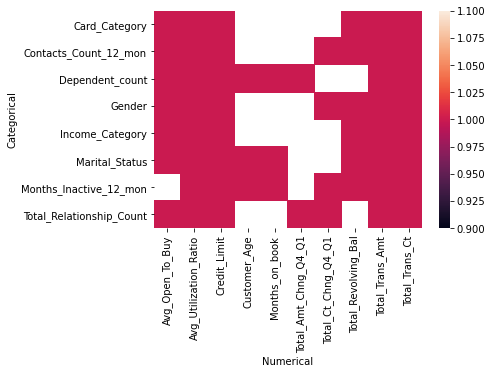

In [65]:
df_num_cat = pd.DataFrame(associated_categorical_and_numerical_variables, columns =['Categorical', 'Numerical', 'Relationship']) 
pivot_num_cat = df_num_cat.pivot('Categorical', 'Numerical','Relationship') 

sns.heatmap(pivot_num_cat)

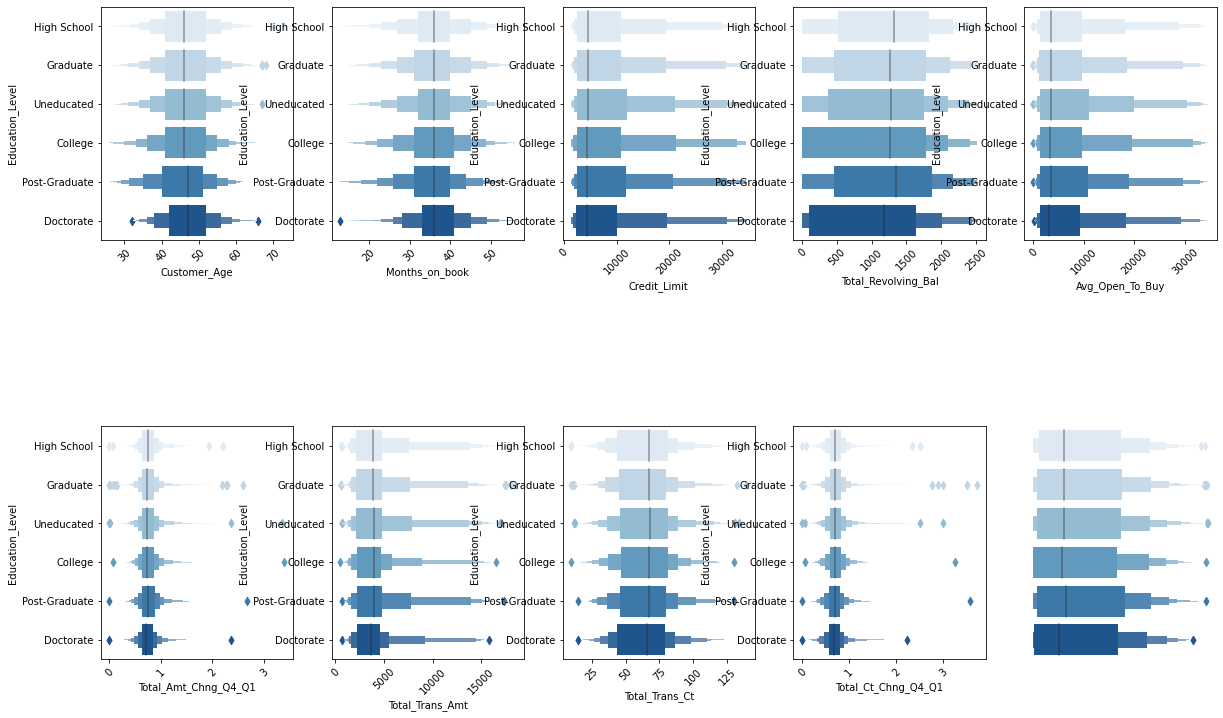

In [66]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count = 0
for num in numerical_columns:
        sns.boxenplot(x=num, data=bank_churners, ax=ax[count], palette='Blues',y='Education_Level')
        plt.setp(ax[count].get_xticklabels(), rotation=45)
        plt.subplots_adjust(hspace = 0.8)
        if count !=0:
            plt.axis("off")
        count+=1

Observations:

Education_Level: There are not numerical variables that are associated with education_level meaning education_level doesn't play a significant role in detrminging churned and non-churned customers. This is surprising.

In [ ]:

fig, ax = plt.subplots(5,3,figsize=(20,12))
ax = ax.ravel()
count = 0
for cat,num,one in associated_categorical_and_numerical_variables[:15]:
        sns.violinplot(y=num, data=bank_churners, ax=ax[count], palette='Blues',x=cat)
        plt.setp(ax[count].get_xticklabels(), rotation=45)
        plt.subplots_adjust(hspace = 0.8)
        count+=1

`Gender` and `Credit_Limit` : Females generally have lower credit limit than males. 

`Gender` and `Avg_Open_To_Buy` : Although males and females tend to spend the same amount of credit, females have less credit left because of their lower credit limit.

`Gender` and `Total_Trans_Amt` and `Total_Trans_Ct`: Females generally spend a little bit more and make more transactions than males.

`Gender` and `Avg_Utilization_Ratio` : Males have a lower utilization ratio because they spend slightly less credit than females but also have a much higher credit limit.

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(20,12))
ax = ax.ravel()
count = 0
for cat,num,one in associated_categorical_and_numerical_variables[15:30]:
        sns.violinplot(y=num, data=bank_churners, ax=ax[count], palette='Blues',x=cat)
        plt.setp(ax[count].get_xticklabels(), rotation=45)
        plt.subplots_adjust(hspace = 0.8)
        count+=1

`Card_Category` vs. `Credit_Limit` : Those who are in the Blue category have a much lower credit_limit than those in Gold, Silver, and Platinum with Platinum having the highest median.

`Card_Category` vs. `Avg_Utilization_Ratio` : Those in the blue category are more likely spend an amount closer to their credit limit than other card categories, but keep in mind their credit limits are much lower than other card categories. There is still a substantial population of blue card holders who don't use their credit cards.

`Customer_Age` vs. `Income_Category`: Those who make 120K+ tend to be older than people with less income.

`Months_on_book` vs. `Income_Category`: The spike at 36 months is prevalant for all people of different income.

`Credit_Limit` vs. `Income_Category`: People who make 80K and more tend to have a higher credit limit than those who make less.

`Avg_Open_To_Buy` vs. `Income_Category`: People who make 80K and more tend have more credit not spent than those who make less.

`Avg_Utilization_Ratio` vs. `Income_Category`: People who make 60K or more tend to have a utilization_ratio closer to 0, meaning they don't spend close to their credit limit.

`Avg_Utilization_Ratio` vs. `Income_Category`: Adults who are very young or very old have less dependents than people who are middle aged.

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(20,12))
ax = ax.ravel()
count = 0
for cat,num,one in associated_categorical_and_numerical_variables[30:45]:
        sns.violinplot(y=num, data=bank_churners, ax=ax[count], palette='Blues',x=cat)
        plt.setp(ax[count].get_xticklabels(), rotation=45)
        plt.subplots_adjust(hspace = 0.8)
        count+=1

`Months_on_book` vs `Dependent_count` : People who have less dependents tend to be older.

`Total_Relationship_Amt` vs. `Total_Trans_Amt`: People who bought less products from the credit card company tend to spend more.

`Total_Relationship_Ct` vs. `Total_Trans_Amt`: People who bought less products from the credit card company tend to have more transactions.

`Months_Inactive_12_mon` vs. `Customer_Age`: Older people tend to be more active.

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(20,12))
ax = ax.ravel()
count = 0
for cat,num,one in associated_categorical_and_numerical_variables[45:]:
        sns.violinplot(y=num, data=bank_churners, ax=ax[count], palette='Blues',x=cat)
        plt.setp(ax[count].get_xticklabels(), rotation=45)
        plt.subplots_adjust(hspace = 0.8)
        count+=1

`Months_on_book` vs. `Months_Inactive_12_mon`: People who were inactive for less months tend to have a longer relationship with the credit card company and did not have a spike at 36 months. But, those who were inactive for a longer time tend to not have as large of a spike at 36 months either.

`Months_Inactive_12_mon`: We can group people into inactive statuses of 0 months, 1-3 months, and 4-6 months. Credit_Limit, Total_Reovlving_Bal, Total_Trans_Amt, Total_Trans_Ct, and Avg-Utilization_Ratio.

`Avg_Utilization_Ratio` vs. `Contacts_Count_12_mon`: Customers who spoke to more contacts have a lower median Avg-Utilization_ratio compared to those who spoke to less contacts, meaning they spent a bigger portion of their credit limit.

### Why are there so many people who have a `Months_on_book` value of 36?

In [69]:
months_36 = bank_churners[bank_churners['Months_on_book'] == 36]
months_not_36 = bank_churners[bank_churners['Months_on_book'] != 36]
display(months_36.describe())
display(months_not_36.describe())

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count     2463.000000   2463.000000      2463.000000          2463.0   
mean         0.174584     46.155907         2.404791            36.0   
std          0.379688      7.606811         1.304467             0.0   
min          0.000000     26.000000         0.000000            36.0   
25%          0.000000     41.000000         1.000000            36.0   
50%          0.000000     46.000000         2.000000            36.0   
75%          0.000000     51.000000         3.000000            36.0   
max          1.000000     73.000000         5.000000            36.0   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               2463.000000             2463.000000   
mean                   3.782379                2.346326   
std                    1.563099                0.966032   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            2463.000000   2463.000000          2463.000000   
mean                2.427933   8505.956232          1151.958587   
std                 1.105146   9115.600767           824.045454   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2516.000000             0.000000   
50%                 2.000000   4375.000000          1264.000000   
75%                 3.000000  10554.500000          1778.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      2463.000000           2463.000000      2463.000000     2463.000000   
mean       7353.997645              0.755181      4498.042225       65.209907   
std        9112.362914              0.222819      3452.387799       23.540643   
min          10.000000              0.000000       510.000000       10.000000   
25%        1283.500000              0.627000      2171.500000       45.000000   
50%        3316.000000              0.733000      3978.000000       68.000000   
75%        9463.500000              0.853000      4784.500000       81.000000   
max       34516.000000              3.397000     18484.000000      134.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  missing_marital_status  \
count          2463.000000            2463.000000             2463.000000   
mean              0.712825               0.276601                0.077954   
std               0.245057               0.279178                0.268153   
min               0.000000               0.000000                0.000000   
25%               0.579000               0.000000                0.000000   
50%               0.698000               0.178000                0.000000   
75%               0.820000               0.504500                0.000000   
max               3.250000               0.995000                1.000000   

       missing_education_level  missing_income_category  
count              2463.000000              2463.000000  
mean                  0.157125                 0.112058  
std                   0.363993                 0.315502  
min                   0.000000                 0.000000  
25%                   0.000000                 0.000000  
50%                   0.000000                 0.000000  
75%                   0.000000                 0.000000  
max                   1.000000                 1.000000

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count     7664.000000   7664.000000      7664.000000     7664.000000   
mean         0.156185     46.380611         2.327375       35.905402   
std          0.363054      8.143922         1.296640        9.180491   
min          0.000000     26.000000         0.000000       13.000000   
25%          0.000000     41.000000         1.000000       29.000000   
50%          0.000000     46.000000         2.000000       37.000000   
75%          0.000000     52.000000         3.000000       42.000000   
max          1.000000     70.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               7664.000000             7664.000000   
mean                   3.822286                2.339509   
std                    1.551582                1.024596   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            7664.000000   7664.000000          7664.000000   
mean                2.464118   8672.445838          1166.302714   
std                 1.106500   9080.363988           812.078213   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2563.750000           461.000000   
50%                 2.000000   4593.500000          1279.500000   
75%                 3.000000  11250.500000          1785.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      7664.000000           7664.000000      7664.000000     7664.000000   
mean       7506.143124              0.761470      4373.891441       64.745825   
std        9083.993353              0.218026      3378.851839       23.451074   
min           3.000000              0.000000       530.000000       10.000000   
25%        1339.500000              0.631000      2151.750000       45.000000   
50%        3512.000000              0.738000      3878.000000       67.000000   
75%       10001.250000              0.862000      4726.250000       80.000000   
max       34516.000000              2.675000     17995.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  missing_marital_status  \
count          7664.000000            7664.000000             7664.000000   
mean              0.712029               0.274345                0.072677   
std               0.235818               0.274578                0.259623   
min               0.000000               0.000000                0.000000   
25%               0.583000               0.026000                0.000000   
50%               0.703000               0.175000                0.000000   
75%               0.818000               0.502000                0.000000   
max               3.714000               0.999000                1.000000   

       missing_education_level  missing_income_category  
count              7664.000000              7664.000000  
mean                  0.147704                 0.109081  
std                   0.354829                 0.311762  
min                   0.000000                 0.000000  
25%                   0.000000                 0.000000  
50%                   0.000000                 0.000000  
75%                   0.000000                 0.000000  
max                   1.000000                 1.000000

In [70]:
bank_churners['is_36'] = np.where(bank_churners['Months_on_book'] == 36, 1,0)

# can't use no

In [71]:
associated_categorical_variables_with_month = []
alpha = .05

for cat in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(bank_churners[cat],bank_churners['is_36']))[1]
    if p_val < alpha:
        associated_categorical_variables_with_month.append(cat)
        print('We REJECT the null hypothesis. There IS an association between', 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with Months_on_book = 36: ')
associated_categorical_variables_with_month

We REJECT the null hypothesis. There IS an association between with p-value of  0.005085781013813553
We REJECT the null hypothesis. There IS an association between with p-value of  0.0012539195669003264
We REJECT the null hypothesis. There IS an association between with p-value of  0.02551023205747242
We REJECT the null hypothesis. There IS an association between with p-value of  0.036308325114023515
Categorical Variables associated with Months_on_book = 36: 


['Gender', 'Income_Category', 'Dependent_count', 'Months_Inactive_12_mon']

In [72]:
bank_churners.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'missing_marital_status', 'missing_education_level',
       'missing_income_category', 'is_36'],
      dtype='object')

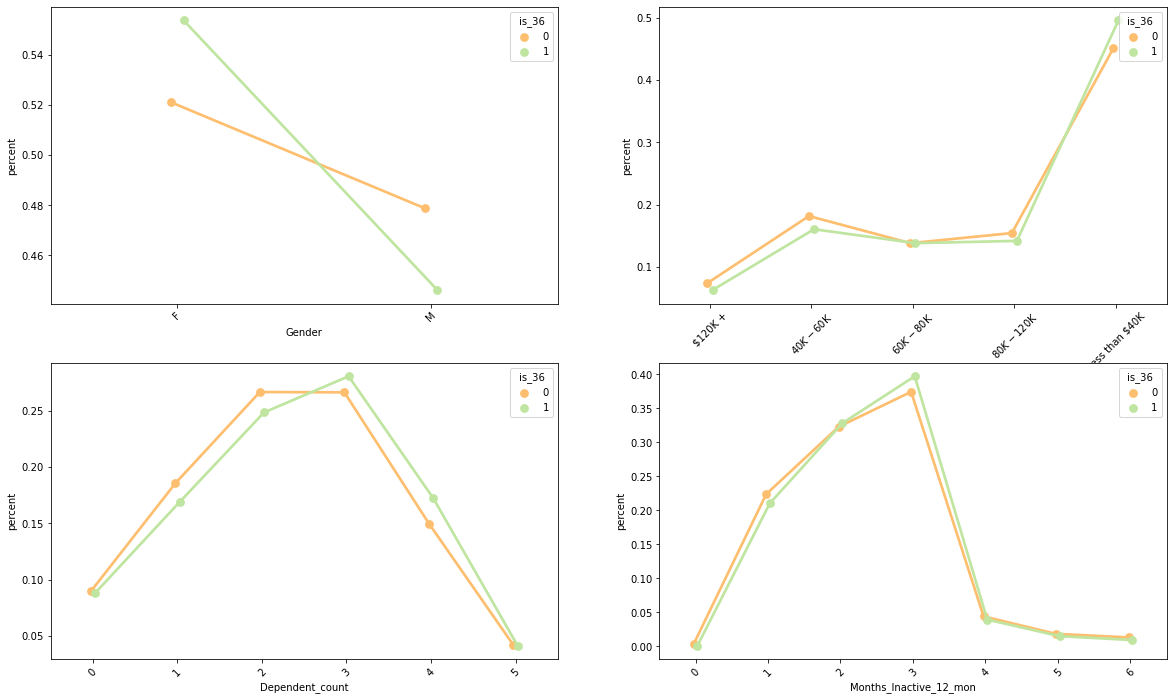

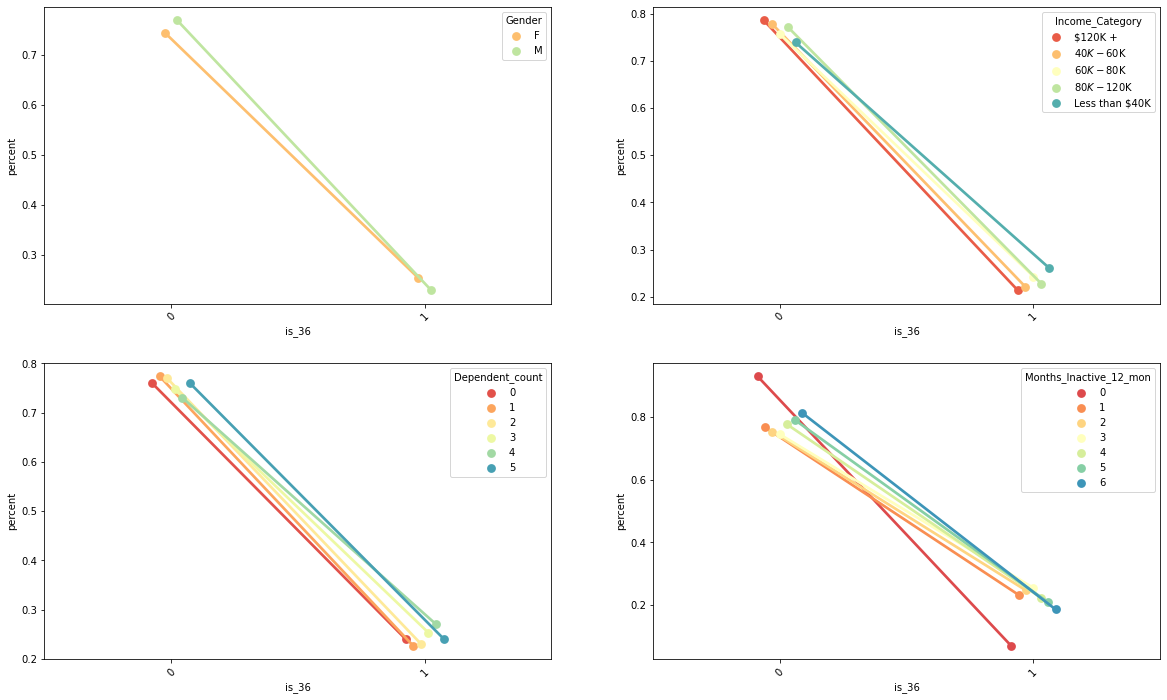

In [164]:
fig, ax = plt.subplots(2,2,figsize=(20,12))
ax = ax.ravel()
count=0

for cat1 in associated_categorical_variables_with_month:
    category_grouped = (bank_churners.groupby(['is_36',cat1]).size() / bank_churners.groupby(['is_36']).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.pointplot(x=cat1, hue='is_36', y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    count+=1 
 
fig, ax = plt.subplots(2,2,figsize=(20,12))
ax = ax.ravel()
count=0
for cat1 in associated_categorical_variables_with_month:
    category_grouped = (bank_churners.groupby(['is_36',cat1]).size() / bank_churners.groupby([cat1]).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.pointplot(x='is_36', hue=cat1, y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    count+=1 

### Observations

`Gender`: The percentage of males and females is more evenly distributed when months-on-book is not equal to 36. Females comprise a larger percentage of people whose months-on-book = 36.

`Income_Category`: As income increases, the likelihood of having a months-on-book value = 36 decreases.

`Dependent_count`: People who have more dependents are more likely to have a months-on-book value of 36.

`Months_Inactive_12_mon`: The more inactive a person is, the more likely they have a months-on-book value of 36.

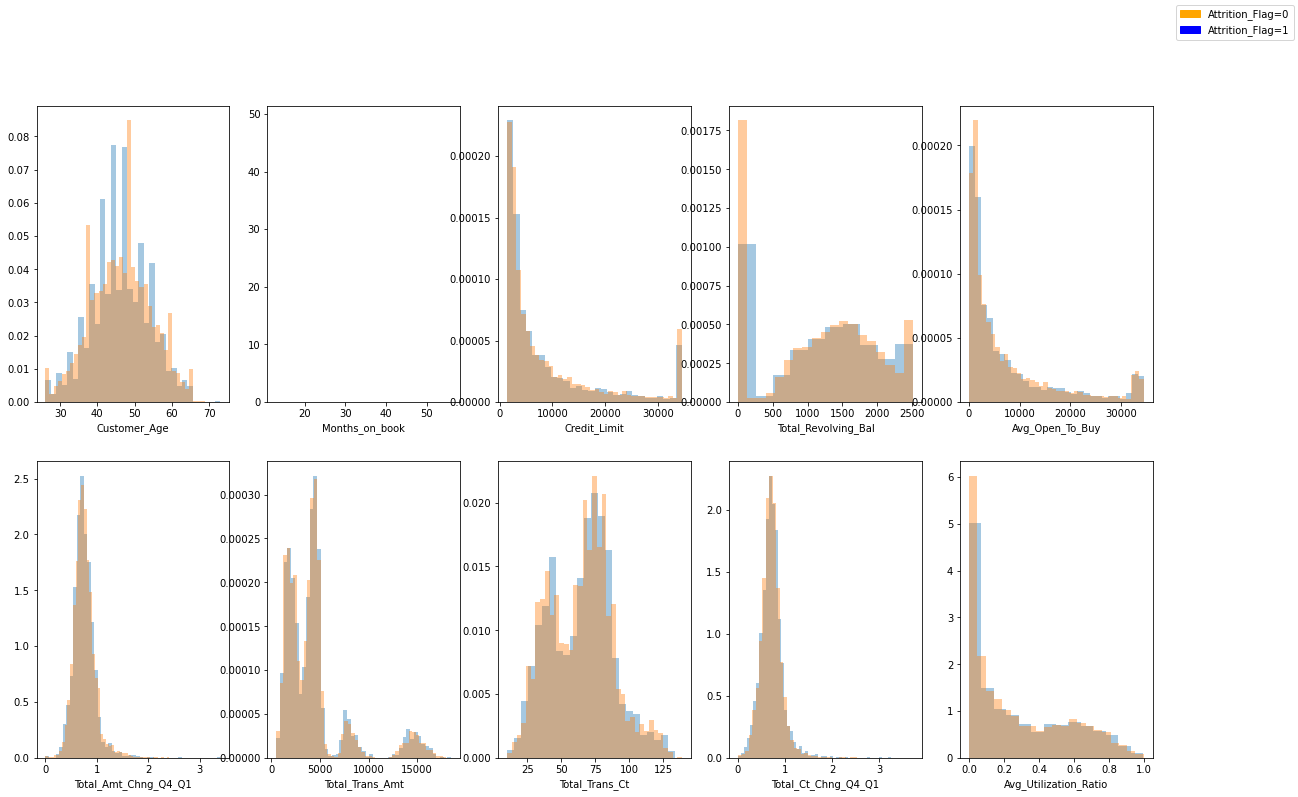

In [74]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0
for num in numerical_columns:
    for a in [months_36[num], months_not_36[num]]:
        sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)
    count+=1
    
orange_patch = mpatches.Patch(color='orange', label='Attrition_Flag=0')
blue_patch = mpatches.Patch(color='blue', label='Attrition_Flag=1')
fig.legend(handles=[orange_patch,blue_patch])

In [75]:
related_columns = []
for col_name in numerical_columns:
    pval = stats.ranksums(months_36[col_name], months_not_36[col_name]).pvalue
    if pval < alpha:
        related_columns.append(col_name)
print('Numerical Features with different medians for customers with Months_on_book = 36 and Months_on_book != 36: ')
related_columns

Numerical Features with different medians for customers with Months_on_book = 36 and Months_on_book != 36: 


[]

In [76]:
stats.ranksums(months_36['Attrition_Flag'], months_not_36['Attrition_Flag']).pvalue

0.16888399360442163

### Observations

Since the p-value is greater than .05, we fail to reject the null hypothesis. There is no relationship betwen attrition flag and months_on_book=36.

Having a months_on_book value of 36 is not associated with any numerical variable nor the target variable.

# 3.0 Feature Engineering

3.1 Train-Test Split

3.2 Handle Categorical Data
- turn into numerical data
- one hot encode, label encode

3.3 Feature Scaling (Numerical Data)

3.4 Feature Selection
- test different methods



## 3.1 Train-Test Split

In [169]:
X = bank_churners.iloc[:,1:]
y = bank_churners.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number X_train dataset: ", X_train.shape)
print("Number y_train dataset: ", y_train.shape)
print("Number X_test dataset: ", X_test.shape)
print("Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Number X_train dataset:  (8101, 23)
Number y_train dataset:  (8101,)
Number X_test dataset:  (2026, 23)
Number y_test dataset:  (2026,)
Before OverSampling, counts of label '1': 1318
Before OverSampling, counts of label '0': 6783 



### Unsupervised Segmentation

# categorical data

In [ ]:
categorical_columns

In [170]:
# gender (1), one hot encode, drop_first
# card_category: blue or not (1), one hot encode
# marital_status (2), one hot encode, drop_first
# income_category (1) label
# education_level (1) label 

def categorical_to_numerical(df):
    
    # ordinal: one hot encode
    if 'Marital_Status' in df.columns:
        df_dummies = pd.get_dummies(df[['Gender','Marital_Status']],drop_first=True)
        df = pd.concat([df, df_dummies], axis=1)
        df.drop(['Gender','Marital_Status'],axis=1,inplace=True)
    else:
        df_dummies = pd.get_dummies(df['Gender'],drop_first=True)
        df = pd.concat([df, df_dummies], axis=1)
        df.drop('Gender',axis=1,inplace=True)
    
    # nominal: label encode
    if 'Card_Category' in df.columns:
        card_mapping = {'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3}
        df['Card_Category'] = df['Card_Category'].map(card_mapping)
    
    edu_mapping = {'Uneducated' : 0, 'High School' : 1, 'College' : 2, 'Graduate' : 3, 'Post-Graduate' : 4, 'Doctorate' : 5}
    df['Education_Level'] = df['Education_Level'].map(edu_mapping)
    
    # label 
    inc_mapping = {'Less than $40K' : 0, '$40K - $60K' : 1, '$60K - $80K' : 2, '$80K - $120K' : 3, '$120K +' : 4}
    df['Income_Category'] = df['Income_Category'].map(inc_mapping)
    return df

In [142]:
X_train_fs.columns

Index(['Customer_Age', 'Gender', 'Education_Level', 'Income_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'missing_marital_status',
       'missing_education_level', 'missing_income_category', 'is_36'],
      dtype='object')

In [171]:
X_train.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'missing_marital_status', 'missing_education_level',
       'missing_income_category', 'is_36'],
      dtype='object')

In [172]:
X_train = categorical_to_numerical(X_train)

In [146]:
X_train_fs = categorical_to_numerical(X_train_fs)

In [147]:
X_train_fs

Customer_Age  Education_Level  Income_Category  \
147             55                3                4   
1985            32                3                0   
8316            35                0                0   
2841            40                3                0   
5824            45                1                1   
...            ...              ...              ...   
9225            30                3                2   
4859            50                0                2   
3264            60                3                2   
9845            51                2                4   
2732            53                3                0   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
147                          3                       2                      0   
1985                         6                       3                      3   
8316                         2                       3                      2   
2841                         3                       1                      1   
5824                         5                       2                      1   
...                        ...                     ...                    ...   
9225                         1                       3                      3   
4859                         4                       3                      3   
3264                         4                       3                      0   
9845                         3                       3                      2   
2732                         4                       2                      4   

      Total_Revolving_Bal  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
147                  1536              34                1.000   
1985                    0              68                0.478   
8316                  587              80                0.702   
2841                 2376              57                0.541   
5824                 2232              79                0.580   
...                   ...             ...                  ...   
9225                 1349             103                0.746   
4859                  642              81                0.723   
3264                 1790              67                0.914   
9845                 1476             119                0.776   
2732                 1938              37                0.682   

      missing_marital_status  missing_education_level  \
147                        0                        0   
1985                       0                        0   
8316                       0                        0   
2841                       0                        1   
5824                       0                        0   
...                      ...                      ...   
9225                       0                        1   
4859                       0                        0   
3264                       0                        1   
9845                       0                        0   
2732                       0                        1   

      missing_income_category  is_36  M  
147                         0      0  1  
1985                        1      0  1  
8316                        1      0  0  
2841                        0      1  0  
5824                        0      1  0  
...                       ...    ... ..  
9225                        0      0  1  
4859                        0      0  1  
3264                        0      0  1  
9845                        0      0  1  
2732                        0      0  0  

[8101 rows x 14 columns]

# 3.4 Feature Selection
- Numerical vs. Target (Correlation)
- Numerical vs. Numerical (Correlation)
- Categorical vs. Target (Chi-Squared)
- Categorical vs. Categorical (Chi-Squared)

## 3.4.1 Numerical vs. Target (Correlation)

In [79]:
correlated_numerical_with_attrition**2

Total_Relationship_Count    0.022402
Months_Inactive_12_mon      0.029529
Contacts_Count_12_mon       0.035735
Total_Revolving_Bal         0.057865
Total_Amt_Chng_Q4_Q1        0.010396
Total_Trans_Amt             0.050078
Total_Trans_Ct              0.141463
Total_Ct_Chng_Q4_Q1         0.097381
Avg_Utilization_Ratio       0.057785
Name: Attrition_Flag, dtype: float64

`Total_Trans_Ct`: This variable explains approximately 14% of the variation of bank attrition. Surprisingly, `Total_Trans_Amt` has a much lower percentage of variation of bank attrition explained (approximately 5%) even though both variables are highly correlated with each other. Therefore, we will keep `Total_Trans_Ct` and drop `Total_Trans_Amt`.

The other variables do not explain a large percentage of variation in churn.

In [124]:
X_train_fs = X_train.copy()
X_train_fs.drop('Total_Trans_Amt',axis=1,inplace=True)

In [106]:
X_train_hist = X_train.copy()

In [107]:
X_train_hist.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'missing_marital_status', 'missing_education_level',
       'missing_income_category', 'is_36'],
      dtype='object')

In [ ]:
X_train_hist.drop('Customer_Age','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','')

In [120]:
X_train_hist = X_train_hist[associated_categorical_hist].join(X_train_hist[associated_numerical_hist],how='inner')

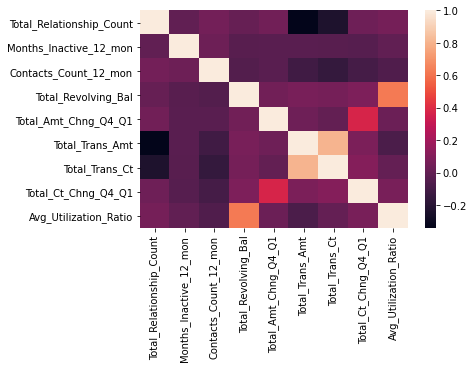

In [121]:
sns.heatmap(X_train_hist.corr())

In [108]:
associated_numerical_hist

['Total_Revolving_Balance',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [109]:
associated_categorical_hist

['Gender',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

## 3.4.2 Numerical vs. Numerical (r^2)

In [125]:
X_train_fs.drop(['Credit_Limit','Months_on_book','Avg_Open_To_Buy'],axis=1,inplace=True)

In [86]:
associated_numerical_positive**2

Credit_Limit           Avg_Open_To_Buy          0.867564
Avg_Open_To_Buy        Credit_Limit             0.867564
Total_Trans_Ct         Total_Trans_Amt          0.773917
Total_Trans_Amt        Total_Trans_Ct           0.773917
Customer_Age           Months_on_book           0.591209
Months_on_book         Customer_Age             0.591209
Avg_Utilization_Ratio  Total_Revolving_Bal      0.502124
Total_Revolving_Bal    Avg_Utilization_Ratio    0.502124
dtype: float64

In [84]:
associated_numerical_negative**2

Avg_Open_To_Buy        Avg_Utilization_Ratio    0.470207
Avg_Utilization_Ratio  Avg_Open_To_Buy          0.470207
dtype: float64

**3.4.2 Key Findings**

`Credit_Limit`,`Avg_Open_To_Buy`,0.867564: Since Avg_Open_To_Buy is part of the equation of solving Credit_Limit, this correlation is not suprising. We will drop one or the other.

`Total_Trans_Ct`,`Total_Trans_Amt`,0.773917: Since Total_Trans_Ct is more correlated with the target variable, we will keep it and drop Total_Trans_Amt.

`Customer_Age`,`Months_on_book`,0.591209: Since the relationship between the two variables are almost exactly equal to 1, we will keep one variable only. We will drop Months_on_book because there is an unusual spike at montsh=36 and we 
were unable to draw any conclusions from it.

`Total_Revolving_Bal`,`Avg_Utilization_Ratio`,0.502124: We will just keep Total_Revolving_Bal since it is used in the equation to find Avg_Utilization_Ratio.

`Avg_Open_To_Buy`,`Avg_Utilization_Ratio`,0.221094: We will keep Avg_Open_To_Buy since it is also used in the equation to find Avg-Utilization_Ratio.

In [87]:
associated_categorical_variables_with_target

['Gender',
 'Education_Level',
 'Income_Category',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

In [88]:
associated_categorical_variables

[('Gender', 'Income_Category'),
 ('Gender', 'Card_Category'),
 ('Gender', 'Contacts_Count_12_mon'),
 ('Marital_Status', 'Card_Category'),
 ('Marital_Status', 'Dependent_count'),
 ('Income_Category', 'Card_Category'),
 ('Income_Category', 'Dependent_count'),
 ('Card_Category', 'Total_Relationship_Count'),
 ('Dependent_count', 'Total_Relationship_Count'),
 ('Dependent_count', 'Contacts_Count_12_mon'),
 ('Total_Relationship_Count', 'Contacts_Count_12_mon')]

In [93]:
X_train_fs.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'missing_marital_status', 'missing_education_level',
       'missing_income_category', 'is_36'],
      dtype='object')

In [126]:
X_train_fs.drop(['Card_Category','Dependent_count','Marital_Status'],axis=1,inplace=True)

In [ ]:
# associated categorical and numerical variables

In [95]:
associated_categorical_and_numerical_variables

[('Gender', 'Credit_Limit', 1),
 ('Gender', 'Total_Revolving_Bal', 1),
 ('Gender', 'Avg_Open_To_Buy', 1),
 ('Gender', 'Total_Trans_Amt', 1),
 ('Gender', 'Total_Trans_Ct', 1),
 ('Gender', 'Total_Ct_Chng_Q4_Q1', 1),
 ('Gender', 'Avg_Utilization_Ratio', 1),
 ('Marital_Status', 'Customer_Age', 1),
 ('Marital_Status', 'Months_on_book', 1),
 ('Marital_Status', 'Credit_Limit', 1),
 ('Marital_Status', 'Total_Revolving_Bal', 1),
 ('Marital_Status', 'Avg_Open_To_Buy', 1),
 ('Marital_Status', 'Total_Trans_Amt', 1),
 ('Marital_Status', 'Total_Trans_Ct', 1),
 ('Marital_Status', 'Avg_Utilization_Ratio', 1),
 ('Card_Category', 'Credit_Limit', 1),
 ('Card_Category', 'Total_Revolving_Bal', 1),
 ('Card_Category', 'Avg_Open_To_Buy', 1),
 ('Card_Category', 'Total_Trans_Amt', 1),
 ('Card_Category', 'Total_Trans_Ct', 1),
 ('Card_Category', 'Avg_Utilization_Ratio', 1),
 ('Income_Category', 'Credit_Limit', 1),
 ('Income_Category', 'Total_Revolving_Bal', 1),
 ('Income_Category', 'Avg_Open_To_Buy', 1),
 ('Incom

In [96]:
numerical_columns

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [98]:
X_train_fs

Customer_Age Gender Education_Level Income_Category  \
147             55      M        Graduate         $120K +   
1985            32      M        Graduate  Less than $40K   
8316            35      F      Uneducated  Less than $40K   
2841            40      F        Graduate  Less than $40K   
5824            45      F     High School     $40K - $60K   
...            ...    ...             ...             ...   
9225            30      M        Graduate     $60K - $80K   
4859            50      M      Uneducated     $60K - $80K   
3264            60      M        Graduate     $60K - $80K   
9845            51      M         College         $120K +   
2732            53      F        Graduate  Less than $40K   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
147                          3                       2                      0   
1985                         6                       3                      3   
8316                         2                       3                      2   
2841                         3                       1                      1   
5824                         5                       2                      1   
...                        ...                     ...                    ...   
9225                         1                       3                      3   
4859                         4                       3                      3   
3264                         4                       3                      0   
9845                         3                       3                      2   
2732                         4                       2                      4   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
147                  1536           9380.0                 1.317   
1985                    0           9238.0                 0.809   
8316                  587           2792.0                 0.670   
2841                 2376           2717.0                 0.822   
5824                 2232            716.0                 0.858   
...                   ...              ...                   ...   
9225                 1349          22411.0                 0.961   
4859                  642           3746.0                 0.815   
3264                 1790           8908.0                 0.981   
9845                 1476          33040.0                 0.763   
2732                 1938            445.0                 0.597   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  missing_marital_status  \
147               34                1.000                       0   
1985              68                0.478                       0   
8316              80                0.702                       0   
2841              57                0.541                       0   
5824              79                0.580                       0   
...              ...                  ...                     ...   
9225             103                0.746                       0   
4859              81                0.723                       0   
3264              67                0.914                       0   
9845             119                0.776                       0   
2732              37                0.682                       0   

      missing_education_level  missing_income_category  is_36  
147                         0                        0      0  
1985                        0                        1      0  
8316                        0                        1      0  
2841                        1                        0      1  
5824                        0                        0      1  
...                       ...                      ...    ...  
9225                        1                        0      0  
4859                        0                        0      0  
3264                        1                        0      0  
9845          

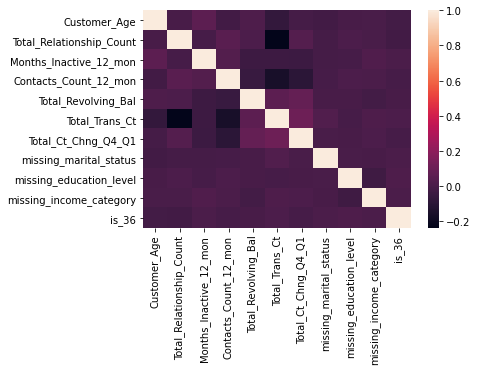

In [132]:
sns.heatmap(X_train_fs.corr())

In [131]:
X_train_fs.drop(['Total_Amt_Chng_Q4_Q1','Avg_Utilization_Ratio'],axis=1,inplace=True)

# Feature Scaling

We will perform normalization.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)

In [151]:
scaler = MinMaxScaler()
X_train_fs = pd.DataFrame(scaler.fit_transform(X_train_fs.values), columns=X_train_fs.columns, index=X_train_fs.index)

In [175]:
X_train

Customer_Age  Dependent_count  Education_Level  Income_Category  \
147       0.617021              0.4              0.6             1.00   
1985      0.127660              0.0              0.6             0.00   
8316      0.191489              0.8              0.0             0.00   
2841      0.297872              0.4              0.6             0.00   
5824      0.404255              0.8              0.2             0.25   
...            ...              ...              ...              ...   
9225      0.085106              0.0              0.6             0.50   
4859      0.510638              0.4              0.0             0.50   
3264      0.723404              0.2              0.6             0.50   
9845      0.531915              0.6              0.4             1.00   
2732      0.574468              0.2              0.6             0.00   

      Card_Category  Months_on_book  Total_Relationship_Count  \
147             0.0        0.860465                       0.4   
1985            0.0        0.325581                       1.0   
8316            0.0        0.279070                       0.2   
2841            0.0        0.534884                       0.4   
5824            0.0        0.534884                       0.8   
...             ...             ...                       ...   
9225            0.0        0.162791                       0.0   
4859            0.0        0.697674                       0.6   
3264            0.0        0.860465                       0.6   
9845            0.0        0.627907                       0.4   
2732            0.0        0.627907                       0.6   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  ...  \
147                 0.333333               0.000000      0.286528  ...   
1985                0.500000               0.500000      0.235799  ...   
8316                0.500000               0.333333      0.058671  ...   
2841                0.166667               0.166667      0.110488  ...   
5824                0.333333               0.166667      0.045641  ...   
...                      ...                    ...           ...  ...   
9225                0.500000               0.500000      0.674826  ...   
4859                0.500000               0.500000      0.089175  ...   
3264                0.500000               0.000000      0.279938  ...   
9845                0.500000               0.333333      1.000000  ...   
2732                0.333333               0.666667      0.028560  ...   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
147         0.187500             0.269251               0.141709   
1985        0.453125             0.128702               0.000000   
8316        0.546875             0.189015               0.174874   
2841        0.367188             0.145665               0.469347   
5824        0.539062             0.156166               0.760804   
...              ...                  ...                    ...   
9225        0.726562             0.200862               0.057286   
4859        0.554688             0.194669               0.146734   
3264        0.445312             0.246096               0.167839   
9845        0.851562             0.208939               0.043216   
2732        0.210938             0.183630               0.817085   

      missing_marital_status  missing_education_level  \
147                      0.0                      0.0   
1985                     0.0                      0.0   
8316                     0.0                      0.0   
2841                     0.0                      1.0   
5824                     0.0                      0.0   
...                      ...                      ...   
9225                     0.0                      1.0   
4859                     0.0                      0.0   
3264                     0.0                      1.0   
9845                     0.0                      0.0   
2732           

In [ ]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()

In [ ]:
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_train_std

In [ ]:
X_train_std.drop('kmeans5',axis=1,inplace=True)
X_train_std.columns

In [176]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_train_std)
    kmeanModel.fit(X_train_std)
 
    distortions.append(sum(np.min(cdist(X_train_std, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train_std.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_train_std, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_train_std.shape[0]
    mapping2[k] = kmeanModel.inertia_

NameError: name 'X_train_std' is not defined

In [ ]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Feature Selection

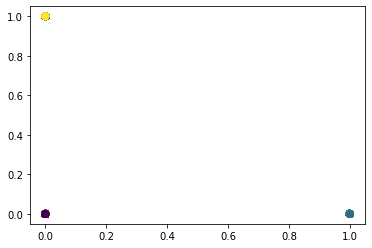

In [177]:
from sklearn.cluster import KMeans
X = X_train
kmeans1 = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans1.predict(X)

plt.scatter(X.loc[:, 'Marital_Status_Married'], X.loc[:, 'Marital_Status_Single'], c=y_kmeans, s=50)

In [ ]:
sns.FacetGridacetgrid()

In [ ]:
X.columns

In [178]:
#X.drop(['kmeans5','kmeans4'],axis=1,inplace=True)
kmeans5 = KMeans(n_clusters=5).fit(X)
y_kmeans = kmeans5.predict(X)
X_train['kmeans5'] = y_kmeans
X_train.corr()['kmeans5']

Customer_Age                0.003194
Dependent_count             0.004337
Education_Level             0.003477
Income_Category            -0.366241
Card_Category              -0.030467
Months_on_book             -0.008351
Total_Relationship_Count   -0.004452
Months_Inactive_12_mon      0.015025
Contacts_Count_12_mon      -0.000869
Credit_Limit               -0.132406
Total_Revolving_Bal        -0.000898
Avg_Open_To_Buy            -0.132346
Total_Amt_Chng_Q4_Q1        0.000170
Total_Trans_Amt            -0.020730
Total_Trans_Ct              0.000916
Total_Ct_Chng_Q4_Q1         0.009489
Avg_Utilization_Ratio       0.052649
missing_marital_status      0.033178
missing_education_level    -0.000555
missing_income_category     0.539455
is_36                       0.007464
Gender_M                   -0.436678
Marital_Status_Married      0.123394
Marital_Status_Single      -0.034966
kmeans5                     1.000000
Name: kmeans5, dtype: float64

In [187]:
kmeans5 = KMeans(n_clusters=5).fit(X)
y_kmeans = kmeans5.predict(X)
X_train['kmeans4'] = y_kmeans
X_train.corr()['kmeans4']

Customer_Age               -0.012633
Dependent_count             0.009525
Education_Level            -0.004197
Income_Category             0.485073
Card_Category               0.054052
Months_on_book             -0.014097
Total_Relationship_Count    0.007209
Months_Inactive_12_mon     -0.000005
Contacts_Count_12_mon       0.036032
Credit_Limit                0.355748
Total_Revolving_Bal         0.020963
Avg_Open_To_Buy             0.353917
Total_Amt_Chng_Q4_Q1        0.032146
Total_Trans_Amt             0.006720
Total_Trans_Ct             -0.062991
Total_Ct_Chng_Q4_Q1         0.008939
Avg_Utilization_Ratio      -0.248825
missing_marital_status      0.053166
missing_education_level    -0.011671
missing_income_category     0.323414
is_36                      -0.009521
Gender_M                    0.647276
Marital_Status_Married      0.160204
Marital_Status_Single      -0.134076
kmeans5                     0.292889
kmeans4                     1.000000
Name: kmeans4, dtype: float64

In [180]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [181]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [182]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.8377279641231699
2 : 1.513730983154322
3 : 1.2936699312963227
4 : 1.1621056174625104
5 : 1.0940871356587338
6 : 1.0729295301599016
7 : 1.0511563437807752
8 : 1.037665726150452
9 : 1.017279607956112


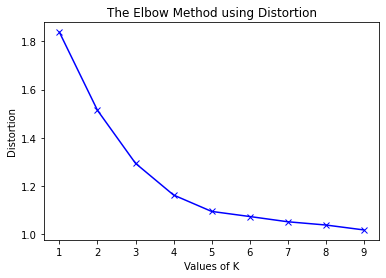

In [183]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [184]:

for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 29006.710466993078
2 : 19360.370390004882
3 : 14175.20840365789
4 : 11642.910405719085
5 : 10226.31494656817
6 : 9857.56706494837
7 : 9472.963102456039
8 : 9207.506549841237
9 : 8897.848459803276


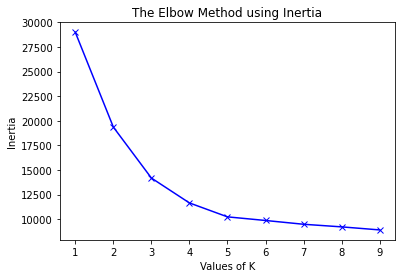

In [185]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

MemoryError: unable to allocate array data.

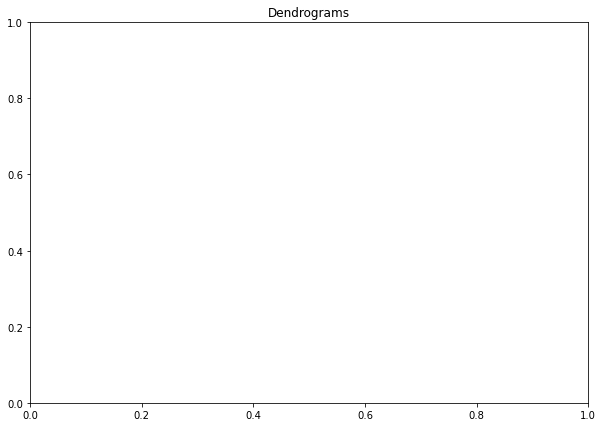

In [186]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_train, method='ward'))

In [ ]:
X_train_

In [ ]:
# when to implement smote? before feature engineering or after?
# 1. feature selection 2. SMOTE b/c smote introduces bias, samples are not independent

# when should i do statistical hypothesis?
# during feature selection

# eda before splitting data? 

# look at kaggle examples

# clustering data, pca, when why? feature engineering

# lasso, ridge, regularization

In [ ]:
# keep | discard
# -----------
credit_limit | avg_open_to_buy
total_revolving_bal | avg_utilization_ratio
gender | income_category
total_trans_ct | total_trans_amt, total_relationship_count
Total_Ct_Chng_Q4_Q1 | Total_Amt_Chng_Q4_Q1

# discard

In [ ]:
# keep credit limit b/c more correlated with target variable, drop avg_open)to_buy

# if we keep credit limit, drop ratio b/c it's part of the equation. then we also keep total_revolving_bal

### Who are the most profitable customers...

According to the New York Times, "Subprime credit card holders do default more often than others, but the interest and fees they paid made them far more profitable for the banks than any other groups of credit card holders, even during the financial crisis" (https://www.nytimes.com/2013/11/08/business/economy/a-credit-card-rule-that-worked-for-consumers.html). So, if we were to calculate which type of customers are the most profitable using our dataset, we should look at customers who have a high Avg_Utilization_Ratio and Total_Trans_Amt.

#### in terms of average card utilization ratio?

Average Card Utilization Ratio: What they owe divided by credit limit. (Total_Revolving_Bal / Credit_Limit)

bank_churners[top_avg_card_utilization_ratio] = np.where(bank_churners.sort_values('Avg_Utilization_Ratio', ascending=False).head(int(.1*len(bank_churners))), 1, 0)

bank_churners[top_avg_card_utilization_ratio] = np.where(bank_churners.index in bank_churners.sort_values('Avg_Utilization_Ratio', ascending=False).head(int(.1*len(bank_churners))).index, 1, 0)
fig, ax = plt.subplots(3,3,figsize=(12,12))
ax = ax.ravel()
count=0

top_avg_card_utilization_ratio = bank_churners.sort_values('Avg_Utilization_Ratio', ascending=False).head(int(.1*len(bank_churners)))
for cat in categorical_columns:
    ar = sns.countplot(x=cat, data=top_avg_card_utilization_ratio,ax=ax[count], palette='Blues')
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.6)
    count+=1 

#### in terms of total transaction amount?

bank_churners.sort_values('Total_Trans_Amt', ascending=False).head(int(.3*len(bank_churners)))

# Model Building

Metrics we care about:
    Why smote
    Finetuning
    Interpreting model: random forest can convert classifications into probabilities.
    Best models

### Important Metrics:

We care the most about recall because as the credit card company, you are more concerned about people who are likely to attrite. False positives are people who we think are going to attrite but don't actually attrite. False negatives are people who we think are going to stay, but acutally levae. We care more about minimizing this group because they are more costly. WE want Recall for people who churn to be high. This means we want a large proportion of people who are positive are properly classified as positive and small portion classified as negative.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# no smote
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
print(classification_report(y_train,y_pred))

In [ ]:
Balancing Data Using SMOTE

In [ ]:

# check version number
import imblearn
print(imblearn.__version__)
1
2
3
# check version number
import imblearn
print(imblearn.__version__)

In [188]:
#We'll use ratio='minority' to resample the minority class.
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

#can't do smote without converting categorical variable into numerical

After OverSampling, the shape of train_X: (13566, 26)
After OverSampling, the shape of train_y: (13566,) 

After OverSampling, counts of label '1': 6783
After OverSampling, counts of label '0': 6783


In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [154]:
sm = SMOTE(random_state=2)
X_train_res_fs, y_train_res = sm.fit_resample(X_train_fs, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res_fs.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (13566, 14)
After OverSampling, the shape of train_y: (13566,) 

After OverSampling, counts of label '1': 6783
After OverSampling, counts of label '0': 6783


In [155]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_res_fs, y_train_res)
y_pred = clf.predict(X_train_fs)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      6783
           1       0.56      0.79      0.65      1318

    accuracy                           0.86      8101
   macro avg       0.76      0.83      0.78      8101
weighted avg       0.89      0.86      0.87      8101



In [158]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_res_fs, y_train_res)
y_pred = logreg.predict(X_train_fs)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      6783
           1       0.49      0.82      0.61      1318

    accuracy                           0.83      8101
   macro avg       0.72      0.83      0.75      8101
weighted avg       0.88      0.83      0.85      8101



In [159]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_res_fs, y_train_res)
y_pred = svm.predict(X_train_fs)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      6783
           1       0.68      0.92      0.78      1318

    accuracy                           0.92      8101
   macro avg       0.83      0.92      0.87      8101
weighted avg       0.93      0.92      0.92      8101



In [160]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train_res_fs, y_train_res)
y_pred = ada.predict(X_train_fs)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6783
           1       0.72      0.79      0.75      1318

    accuracy                           0.92      8101
   macro avg       0.84      0.87      0.85      8101
weighted avg       0.92      0.92      0.92      8101



In [190]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      6783
           1       0.46      0.83      0.59      1318

    accuracy                           0.81      8101
   macro avg       0.71      0.82      0.73      8101
weighted avg       0.88      0.81      0.83      8101



In [198]:
random_grid = {
 'max_depth': [10, 20, 30,],
 'max_features': ['auto'],
 'min_samples_leaf': [10,20,30],
 'min_samples_split': [10,20,30],
 'n_estimators': [50, 100, 150, 200]}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_res, y_train_res)
rf_random.best_params_ #(1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [201]:
clf = RandomForestClassifier(max_depth=30,min_samples_leaf=10,min_samples_split=10,n_estimators=100,random_state=42)
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_train_res)
print(classification_report(y_train_res,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6783
           1       0.98      0.98      0.98      6783

    accuracy                           0.98     13566
   macro avg       0.98      0.98      0.98     13566
weighted avg       0.98      0.98      0.98     13566



In [191]:
X_train_res.columns

Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Income_Category',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'missing_marital_status',
       'missing_education_level', 'missing_income_category', 'is_36',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'kmeans5', 'kmeans4'],
      dtype='object')

In [192]:
clf.feature_importances_

array([5.54127163e-04, 4.75038162e-03, 2.76513450e-03, 2.34652146e-03,
       0.00000000e+00, 0.00000000e+00, 2.07561011e-02, 4.42691671e-02,
       6.73850736e-02, 2.38121623e-03, 1.55607626e-01, 1.11287536e-02,
       1.53652545e-02, 2.26815807e-01, 2.41373613e-01, 1.26030066e-01,
       7.84220098e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.91472048e-05, 0.00000000e+00])

In [193]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_res, y_train_res)
y_pred = logreg.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      6783
           1       0.54      0.84      0.66      1318

    accuracy                           0.86      8101
   macro avg       0.75      0.85      0.78      8101
weighted avg       0.90      0.86      0.87      8101



C:\Users\m2mar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [194]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_res, y_train_res)
y_pred = svm.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6783
           1       0.78      0.95      0.86      1318

    accuracy                           0.95      8101
   macro avg       0.88      0.95      0.91      8101
weighted avg       0.96      0.95      0.95      8101



In [195]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train_res, y_train_res)
y_pred = ada.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6783
           1       0.85      0.90      0.87      1318

    accuracy                           0.96      8101
   macro avg       0.91      0.94      0.92      8101
weighted avg       0.96      0.96      0.96      8101



In [ ]:
Without finetuning, it seems that SVM has the best recall. 